## Hospital Rating Classification (Capstone Project)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

### Creating Helper Functions.

In [3]:
def display_scrollable_html(html_content):
    """
    Display scrollable HTML content in Jupyter Notebook.
    
    Parameters:
    - html_content (str): The HTML content to be displayed.
    """
    display(HTML(html_content))

# Example with DataFrame
def display_dataframe_as_html(df):
    """
    Convert DataFrame to HTML and display it as scrollable HTML content in Jupyter Notebook.
    
    Parameters:
    - df (pandas.DataFrame): The DataFrame to be displayed.
    """
    html_content = df.to_html()
    display_scrollable_html(html_content)

# Example with Series
def display_series_as_html(series):
    """
    Convert Series to HTML and display it as scrollable HTML content in Jupyter Notebook.
    
    Parameters:
    - series (pandas.Series): The Series to be displayed.
    """
    html_content = series.to_frame().to_html()
    display_scrollable_html(html_content)

# Example with list
def display_list_as_html(lst):
    """
    Convert list to HTML and display it as scrollable HTML content in Jupyter Notebook.
    
    Parameters:
    - lst (list): The list to be displayed.
    """
    html_content = "<ul>"
    for item in lst:
        html_content += "<li>{}</li>".format(item)
    html_content += "</ul>"
    display_scrollable_html(html_content)

## Importing the dataset

In [4]:
df = pd.read_csv('hospital-info.csv')

## Understanding the Data.

### 1. How big is the data?

In [5]:
df.shape

(3057, 94)

The data has 3057 rows and 94 columns.

### 2. How does the data look like?

In [6]:
df.head()

Provider ID                     Hospital Name                     Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1        10005     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET   
3        10007          MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
4        10008       CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   

       City State  ZIP Code County Name  Phone Number Hospital Ownership  \
0    DOTHAN    AL     36301     HOUSTON    3347938701         Government   
1      BOAZ    AL     35957    MARSHALL    2565938310         Government   
2  FLORENCE    AL     35631  LAUDERDALE    2567688400         Government   
3       OPP    AL     36467   COVINGTON    3344933541          Voluntary   
4   LUVERNE    AL     36049    CRENSHAW    3343353374             Others   

  Emergency Services  ...  SAFETY_HAI_3_SIR_Score  SAFETY_HAI_4_SIR_Score  \
0                Yes  ...                -1.87000               -0.000000   
1                Yes  ...                -0.38600               -0.871177   
2                Yes  ...                -0.31000               -0.871177   
3                Yes  ...                -0.96398               -0.871177   
4                Yes  ...                -0.96398               -0.871177   

   SAFETY_HAI_5_SIR_Score  SAFETY_HAI_6_SIR_Score  MED_OP_10_Score  \
0               -0.422000                  -0.787             -6.4   
1               -1.388000                  -0.405            -13.3   
2               -1.261000                  -0.513            -11.8   
3               -0.987212                  -0.000            -24.3   
4               -0.987212                  -0.585             -3.6   

   MED_OP_11_Score  MED_OP_13_Score  MED_OP_14_Score  MED_OP_8_Score  \
0        -0.900000        -7.100000        -2.400000      -38.100000   
1       -10.200000        -5.300000        -4.000000      -42.800000   
2        -4.600000        -0.000000        -4.600000      -45.600000   
3        -6.100000        -4.716942        -2.964405      -39.964766   
4        -2.936245        -4.716942        -0.600000      -39.964766   

   MED_OP_9_Score  
0            -6.9  
1            -5.1  
2            -9.1  
3           -20.7  
4            -8.2  

[5 rows x 94 columns]

#### Get random rows to avoid bias.

Sometimes there are same type of data at the head or tail. IMO it's better approach to see random rows.

In [7]:
df.sample(5)

Provider ID                         Hospital Name               Address  \
761        110083                     PIEDMONT HOSPITAL  1968 PEACHTREE RD NW   
1038       150181       ST VINCENT FISHERS HOSPITAL INC       13861 OLIO ROAD   
302         50276  CONTRA COSTA REGIONAL MEDICAL CENTER  2500 ALHAMBRA AVENUE   
211         50067          OAK VALLEY HOSPITAL DISTRICT         350 S OAK AVE   
1805       330135        BON SECOURS COMMUNITY HOSPITAL  160 EAST MAIN STREET   

             City State  ZIP Code   County Name  Phone Number  \
761       ATLANTA    GA     30309        FULTON    4046055000   
1038      FISHERS    IN     46037      HAMILTON    3174159000   
302      MARTINEZ    CA     94553  CONTRA COSTA    9253705000   
211       OAKDALE    CA     95361    STANISLAUS    2098473011   
1805  PORT JERVIS    NY     12771        ORANGE    8458565351   

     Hospital Ownership Emergency Services  ...  SAFETY_HAI_3_SIR_Score  \
761           Voluntary                Yes  ...                -1.61800   
1038          Voluntary                Yes  ...                -0.96398   
302          Government                Yes  ...                -1.43900   
211          Government                Yes  ...                -0.96398   
1805          Voluntary                Yes  ...                -0.96398   

      SAFETY_HAI_4_SIR_Score  SAFETY_HAI_5_SIR_Score  SAFETY_HAI_6_SIR_Score  \
761                -1.945000               -1.695000                -0.93600   
1038               -0.871177               -0.987212                -0.84197   
302                -0.871177               -0.000000                -0.91100   
211                -0.871177               -0.987212                -0.84197   
1805               -0.871177               -0.987212                -0.58200   

      MED_OP_10_Score  MED_OP_11_Score  MED_OP_13_Score  MED_OP_14_Score  \
761              -8.1             -0.6        -5.100000        -2.400000   
1038             -4.3             -0.0        -1.600000        -2.964405   
302              -8.1             -3.2        -1.400000        -2.964405   
211              -2.5             -0.0        -4.716942        -2.964405   
1805             -6.6             -6.8        -4.716942        -2.964405   

      MED_OP_8_Score  MED_OP_9_Score  
761       -52.900000            -8.0  
1038      -39.964766            -8.9  
302       -39.964766            -3.3  
211       -39.964766            -9.5  
1805      -39.964766            -4.9  

[5 rows x 94 columns]

### 3. What is the data type of cols?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

### 4. Are there any missing values?

In [9]:
display_series_as_html(df.isnull().sum() / df.shape[0])

### 5. How does the data look mathematically?

#### Helper Function to describe categorical data.

In [10]:
def describe_categorical_data(df):
    # Select only categorical columns
    cat_columns = df.select_dtypes(include=['object', 'category'])

    # Initialize an empty list to store summary statistics
    summary_stats = []

    # Loop through each categorical column
    for column in cat_columns:
        unique_values = df[column].nunique()  # Count unique values
        most_common = df[column].mode().iloc[0]  # Most common value
        frequency = df[column].value_counts().iloc[0]  # Frequency of the most common value

        # Append summary statistics to the list
        summary_stats.append({
            'Column': column,
            'Unique Values': unique_values,
            'Most Common': most_common,
            'Frequency': frequency
        })

    # Convert the list of dictionaries to a DataFrame
    summary_stats_df = pd.DataFrame(summary_stats)

    return summary_stats_df


#### Numerical Data

In [11]:
display_dataframe_as_html(df.describe().T)

#### Categorical Data.

In [12]:
display_dataframe_as_html(describe_categorical_data(df))

### 6. Are there duplicate values?

In [13]:
df.duplicated().sum()

0

### 7. How is the correlation between cols?

In [14]:
display_series_as_html(df.corr(numeric_only=True)['Hospital overall rating'].sort_values(ascending=False))

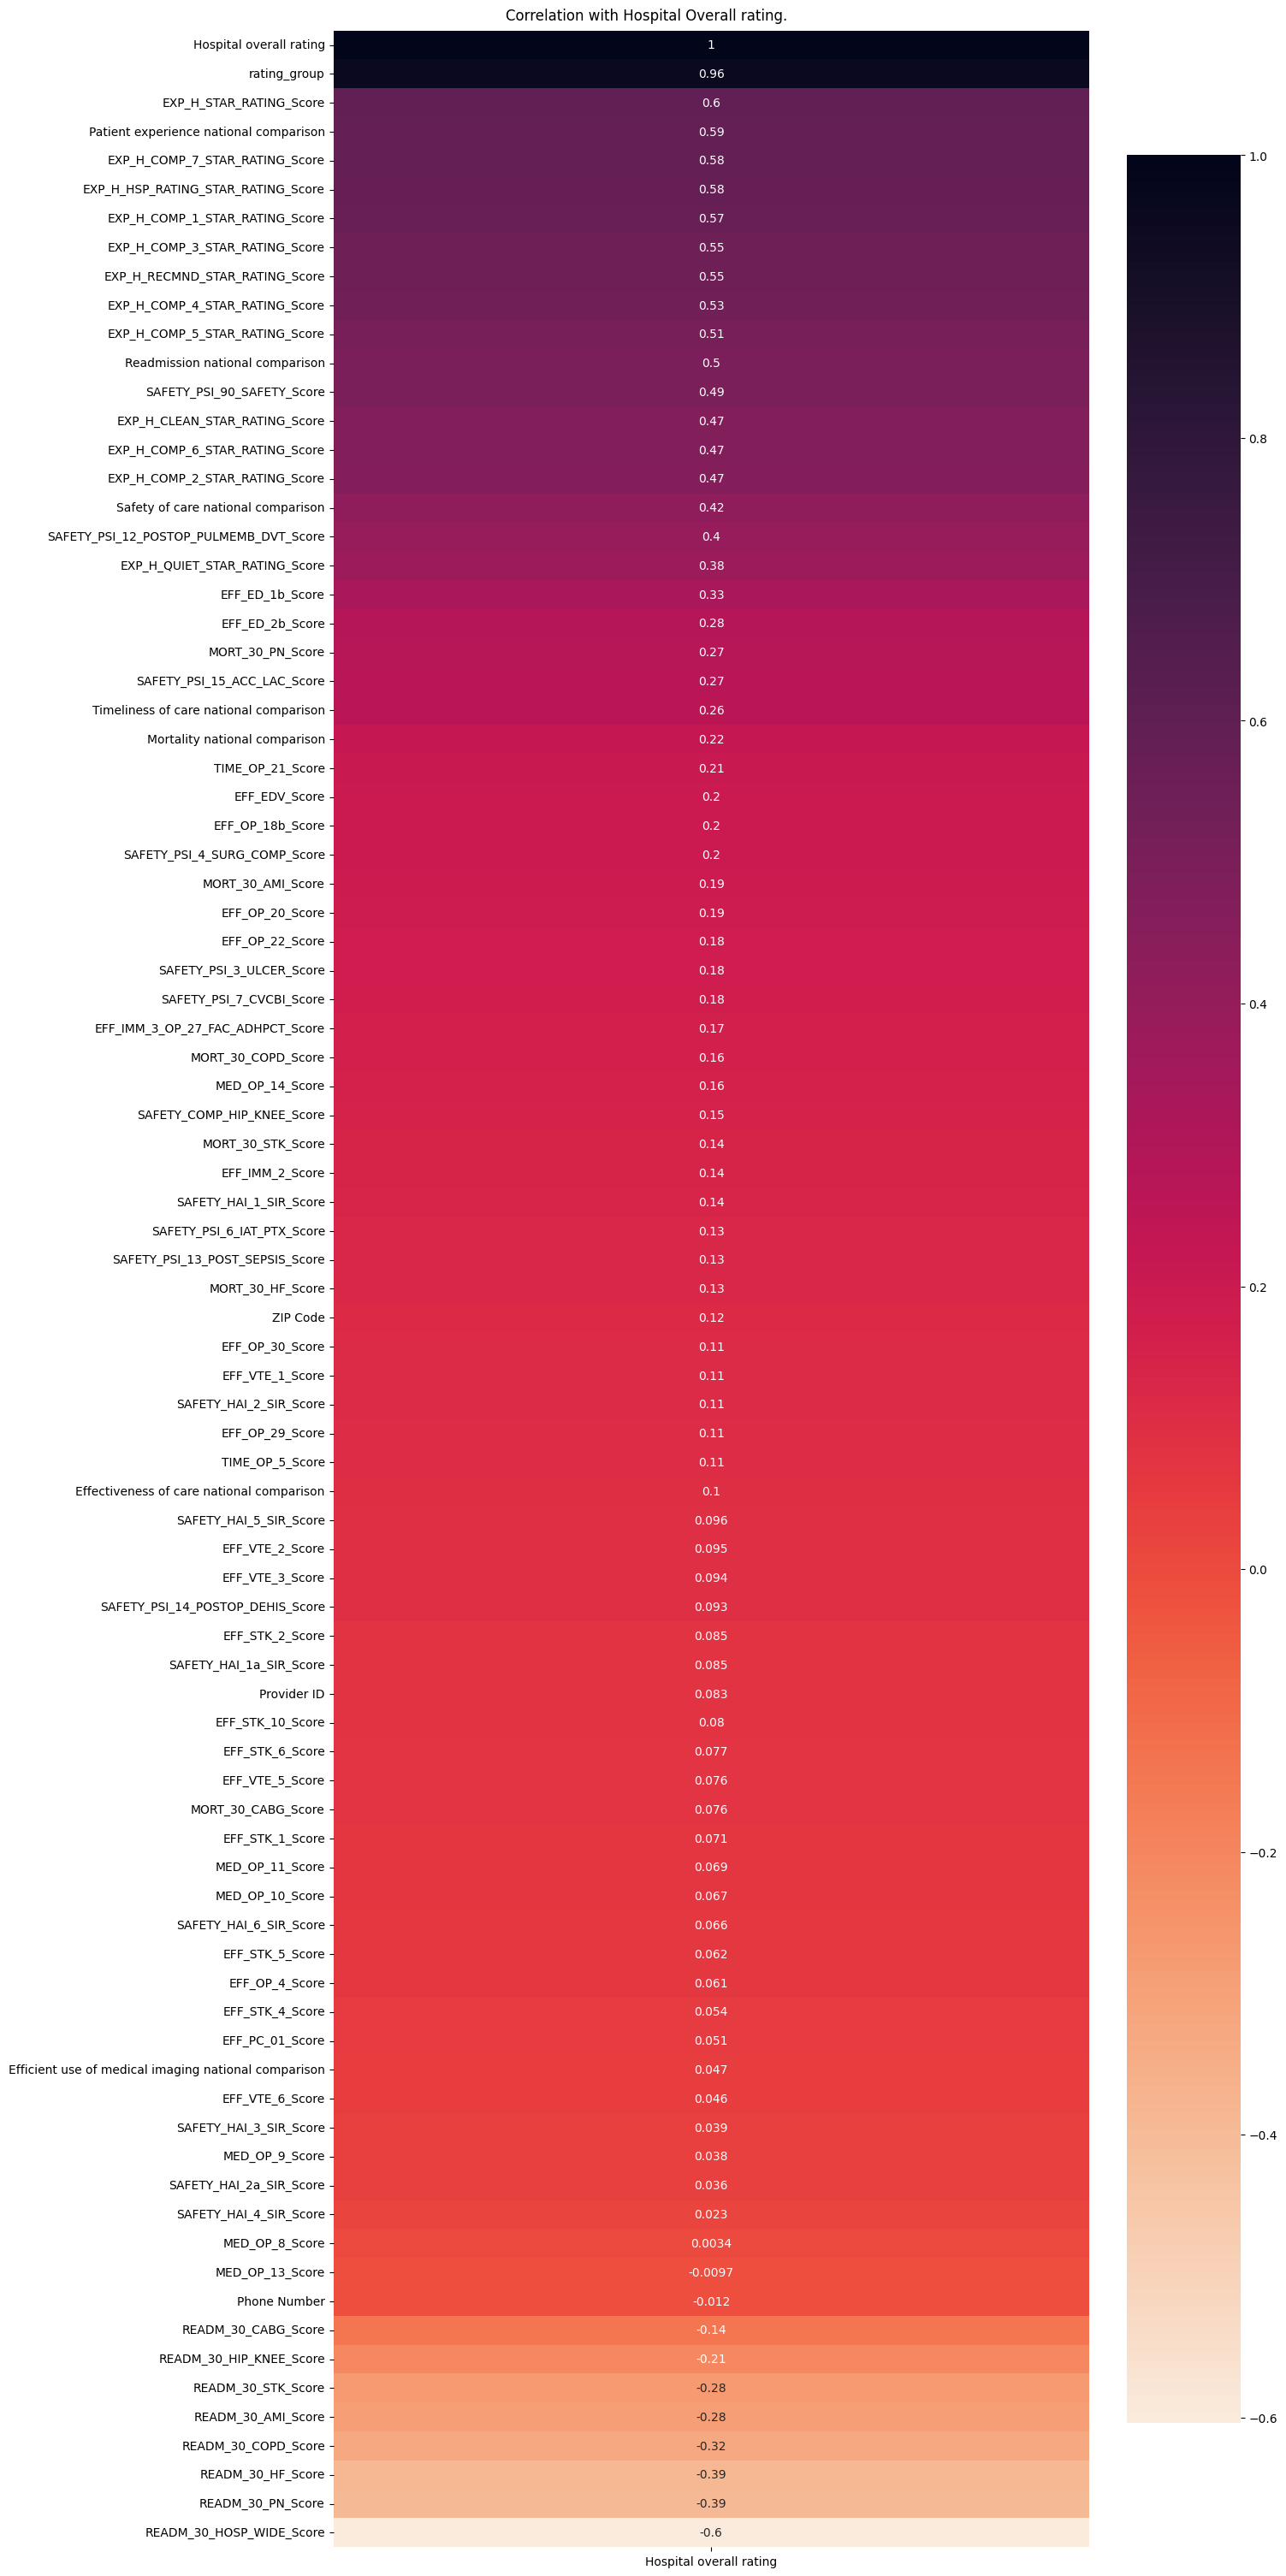

In [15]:
fig, ax = plt.subplots(figsize=(15, 30), constrained_layout=True)
sns.heatmap(df.corr(numeric_only=True)['Hospital overall rating'].sort_values(ascending=False).to_frame(), annot=True, ax=ax, cmap=sns.color_palette("rocket_r", as_cmap=True))
fig.suptitle("Correlation with Hospital Overall rating.")
plt.show()

## Exploring the Dataset.

### Univariate Analysis.

#### 1. Categorical Data

In [16]:
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

##### a. Countplot

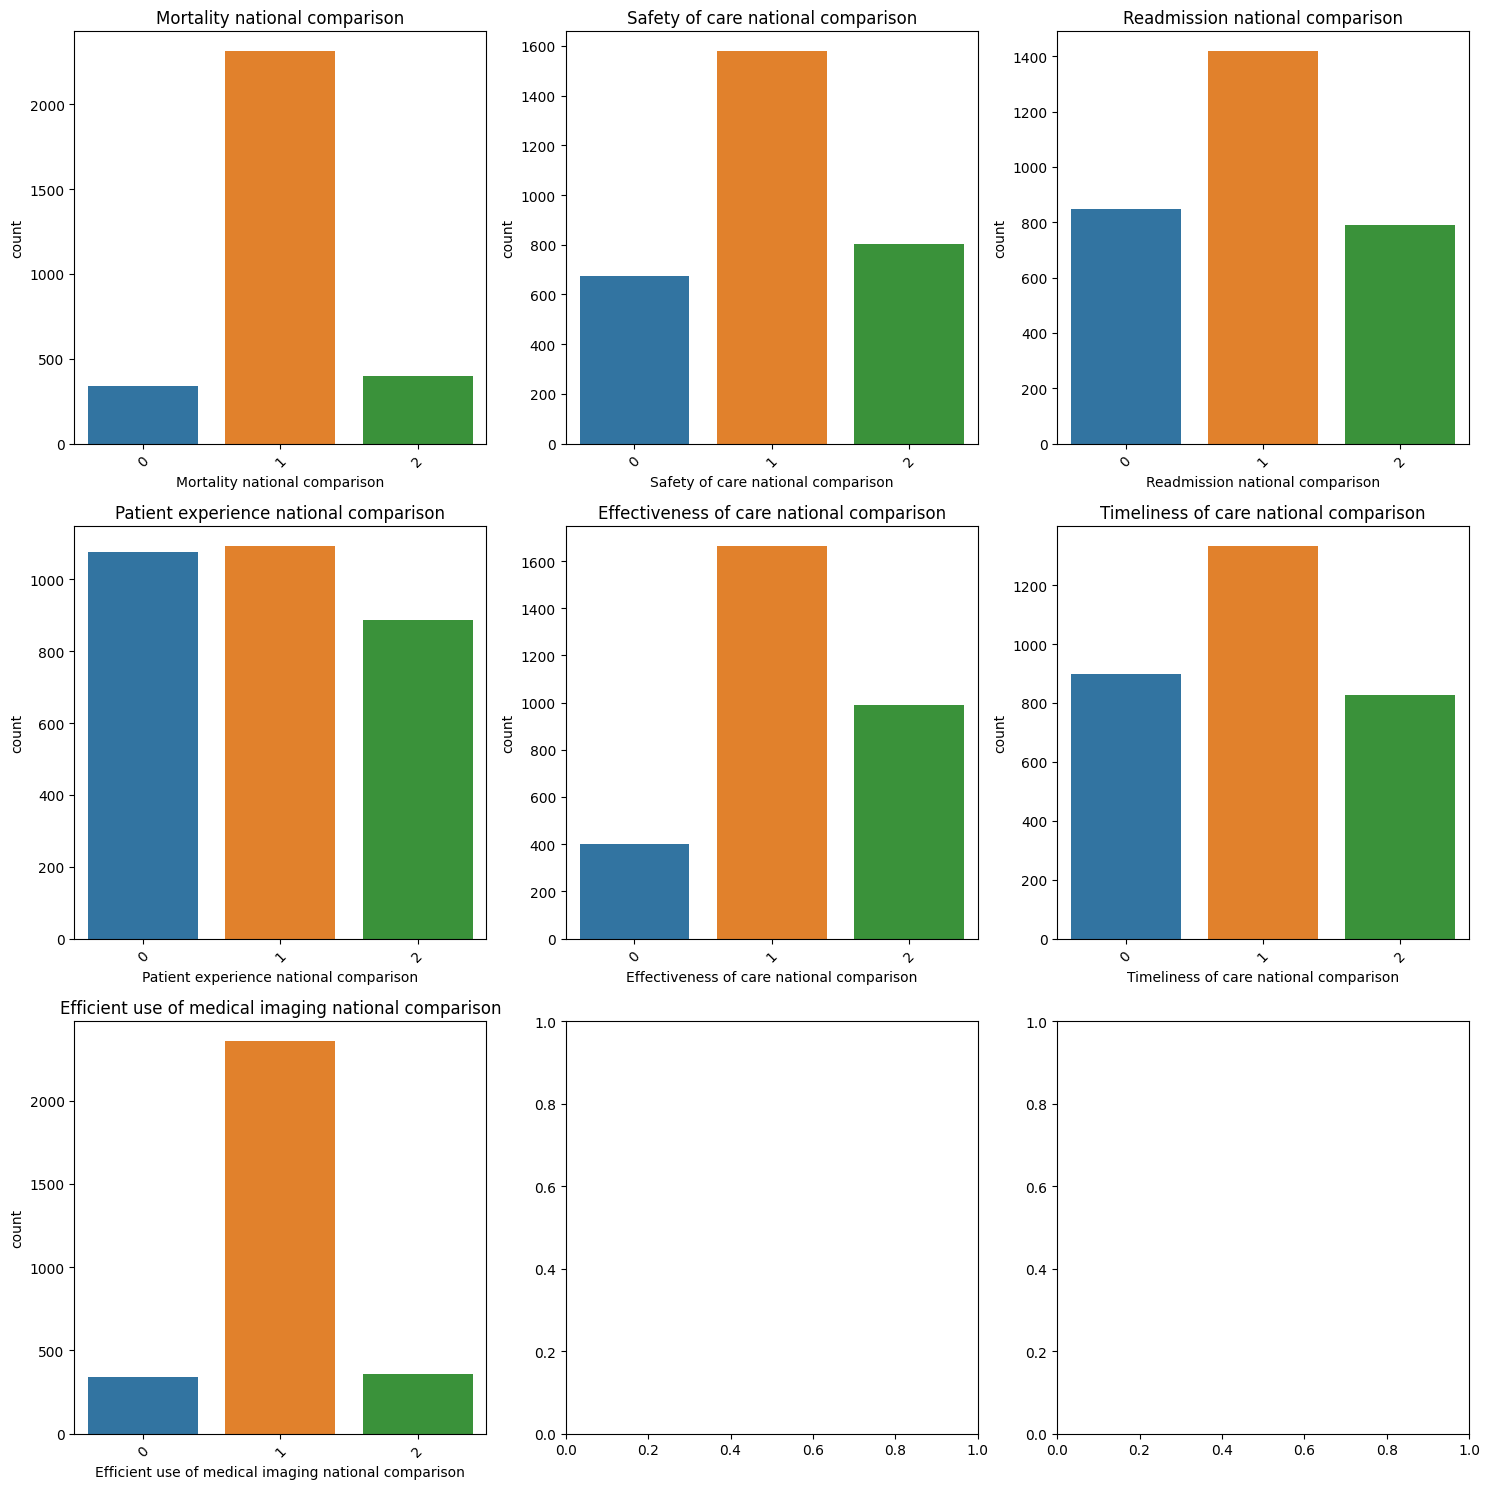

In [17]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a countplot
for i, feature in enumerate(features):
    # Create the countplot for the current feature
    sns.countplot(x=feature, data=df, ax=axes[i])
    
    # Set the title for the subplot
    axes[i].set_title(feature)
    
    # Rotate x-axis labels for better readability if needed
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()
    

##### B. pie chart

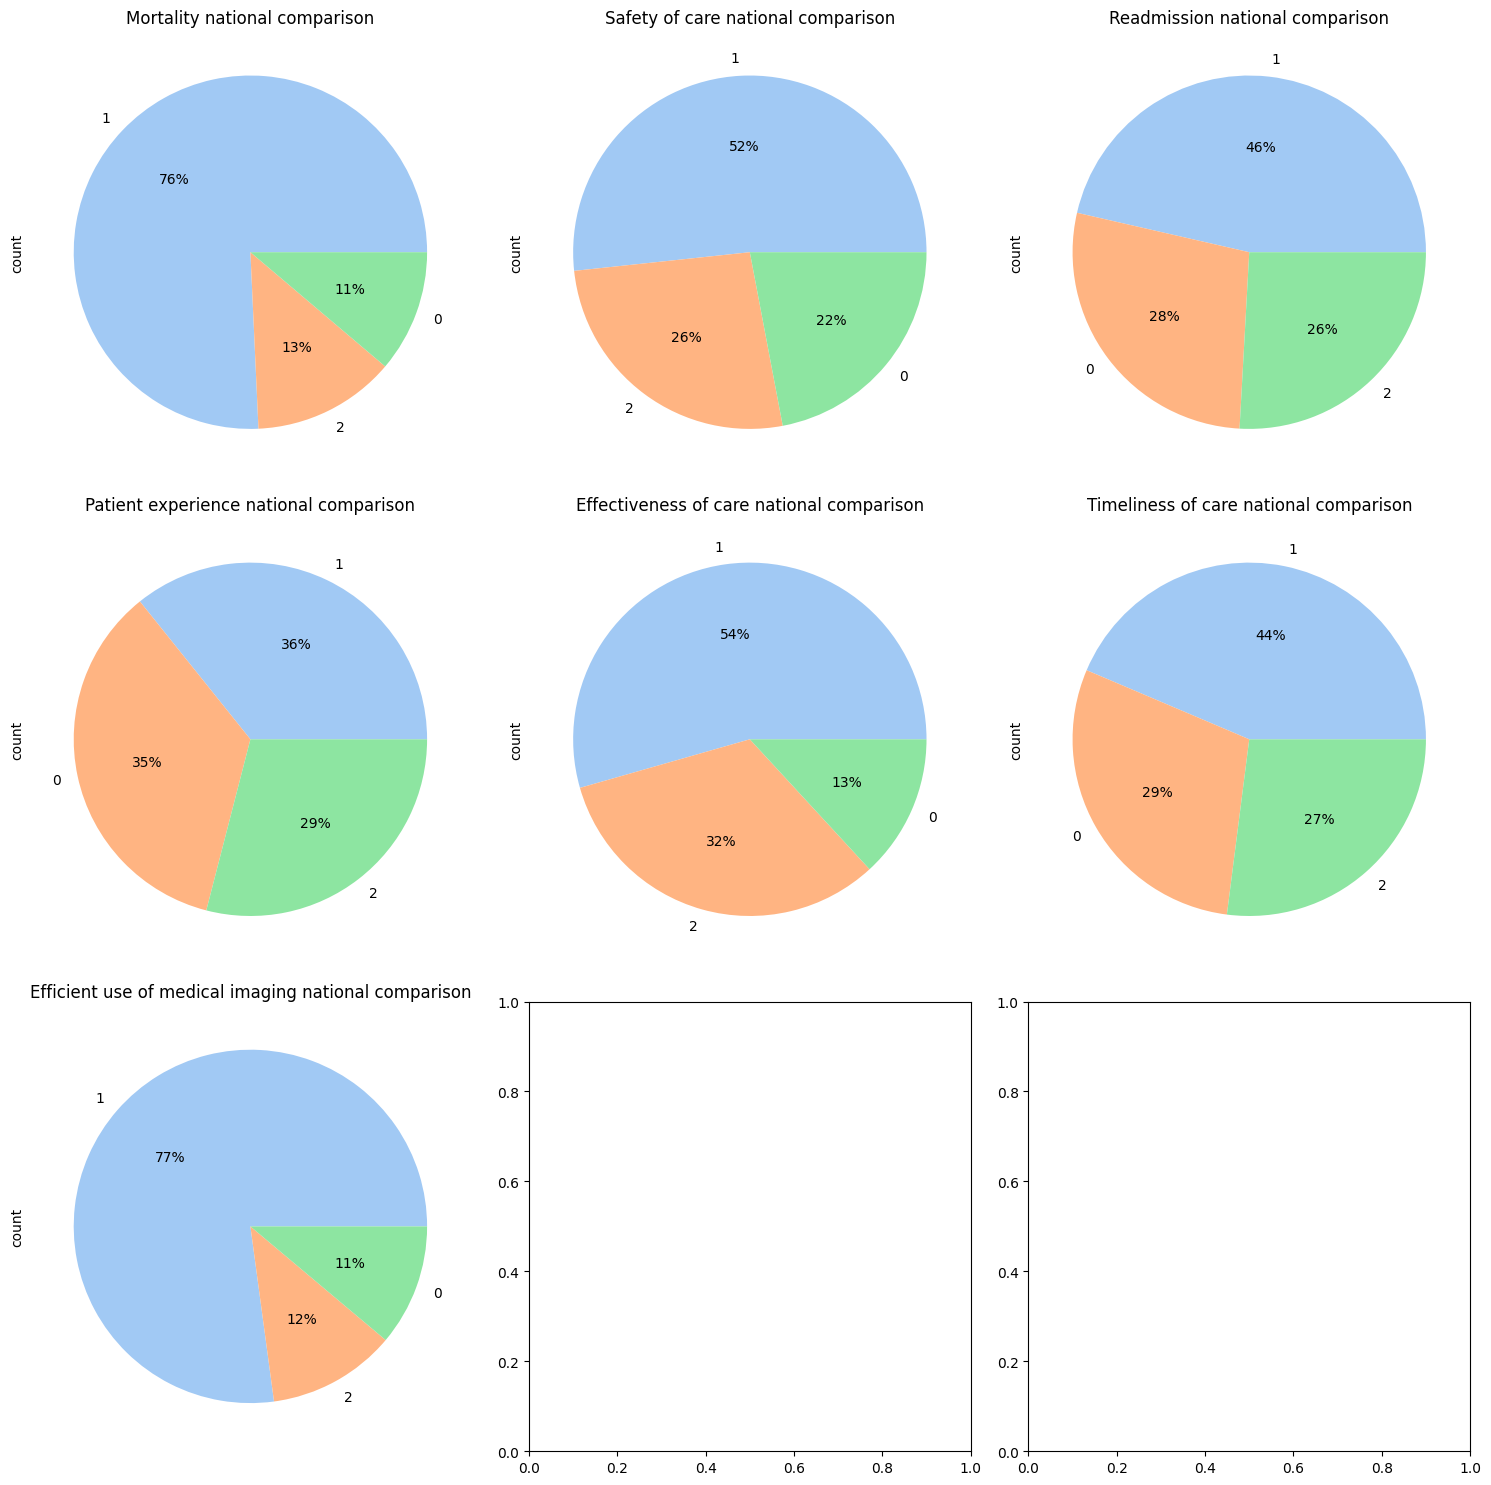

In [18]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a countplot
for i, feature in enumerate(features):
    ax = df[feature].value_counts().plot(kind='pie', colors=colors, autopct='%.0f%%', ax=axes[i])
    
    ax.set_title(feature)
    
    # Rotate x-axis labels for better readability if needed
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

#### 2. Numerical Data

### Grouping the Measures with their subset.

In [19]:
measures =  ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

In [20]:
read_mission_cols =  df.columns[df.columns.str.startswith('READM_')].to_list()

mortality_cols =  df.columns[df.columns.str.startswith('MORT_')].to_list()

timeliness_cols = df.columns[df.columns.str.startswith('TIME_')].to_list()

eff_care_cols = df.columns[df.columns.str.startswith('EFF_')].to_list()

experience_cols =  df.columns[df.columns.str.startswith('EXP_')].to_list()

safety_cols =  df.columns[df.columns.str.startswith('SAFETY_')].to_list()

med_img_cols = df.columns[df.columns.str.startswith('MED_')].to_list()

### a. Histogram

In [21]:
# Define the columns for each measure
measure_columns = {
    'Mortality': mortality_cols,
    'Readmission': read_mission_cols,
    'Timeliness': timeliness_cols,
    'Effectiveness of Care': eff_care_cols,
    'Patient Experience': experience_cols,
    'Safety of Care': safety_cols,
    'Medical Imaging': med_img_cols
}

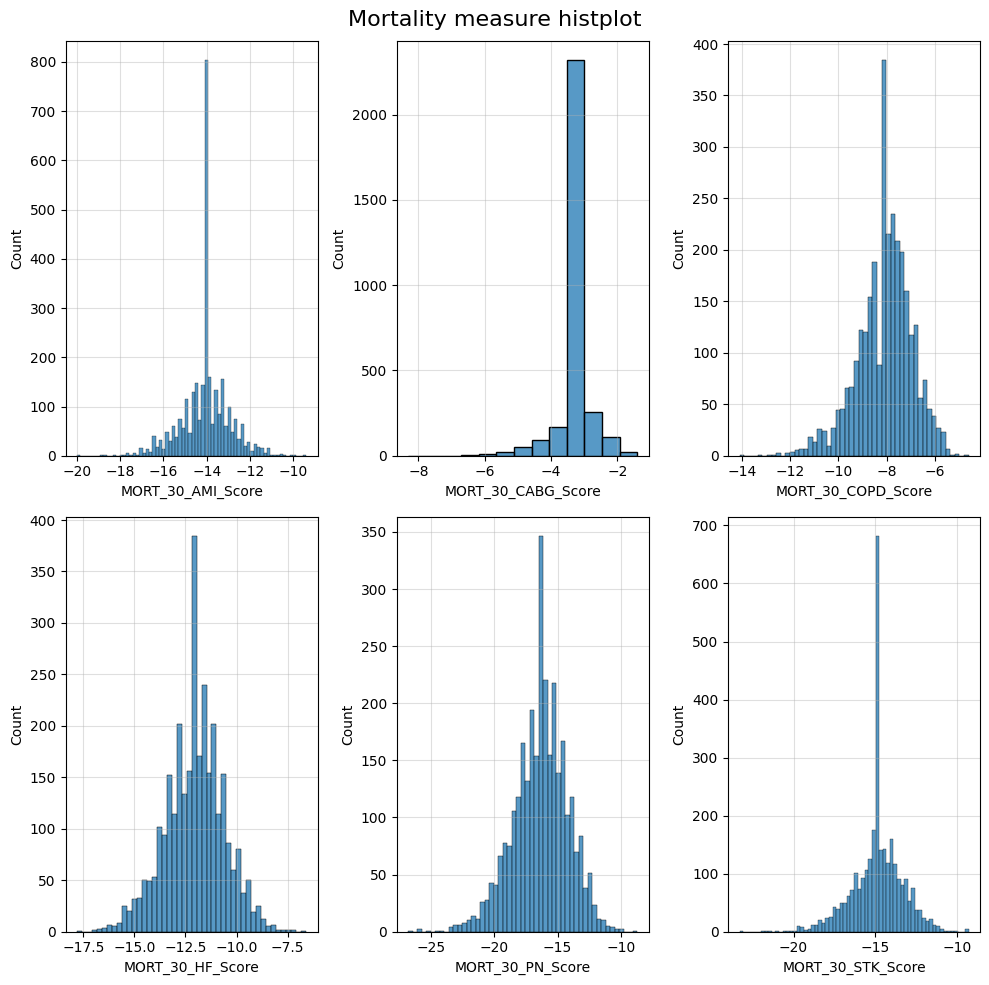

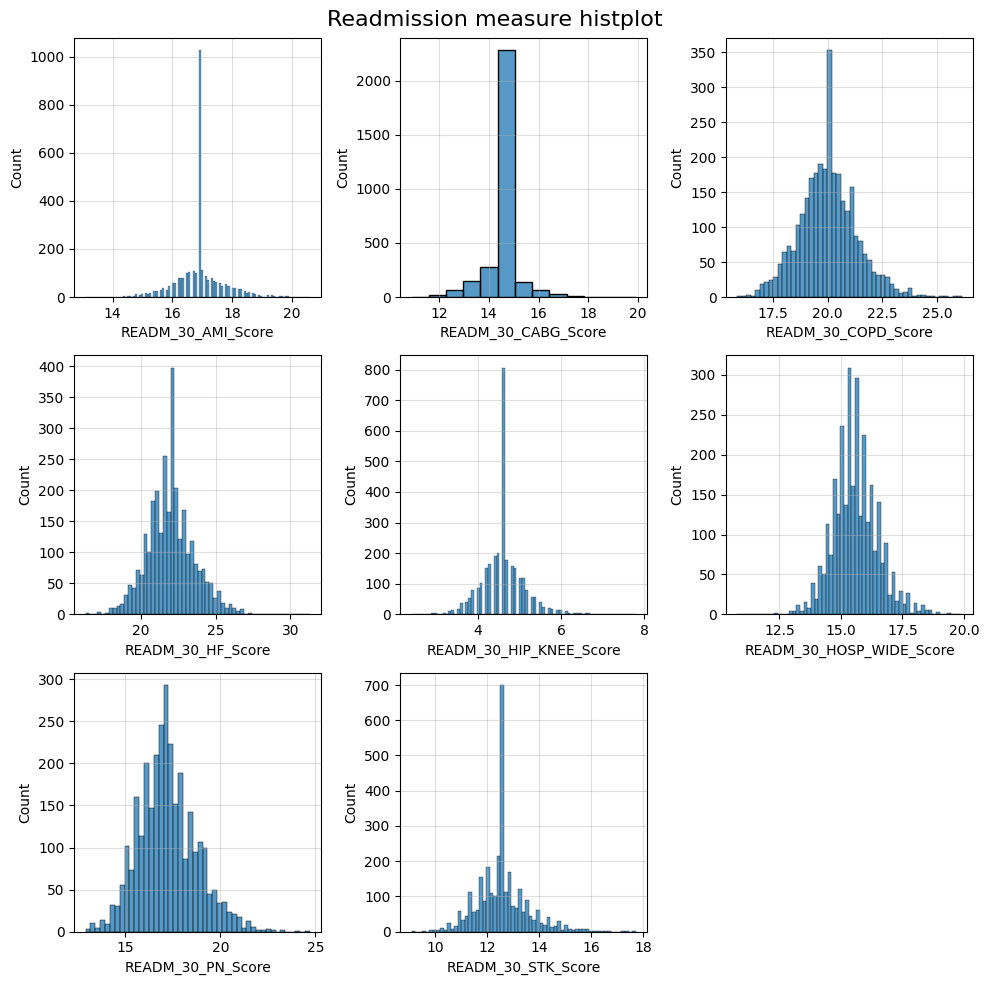

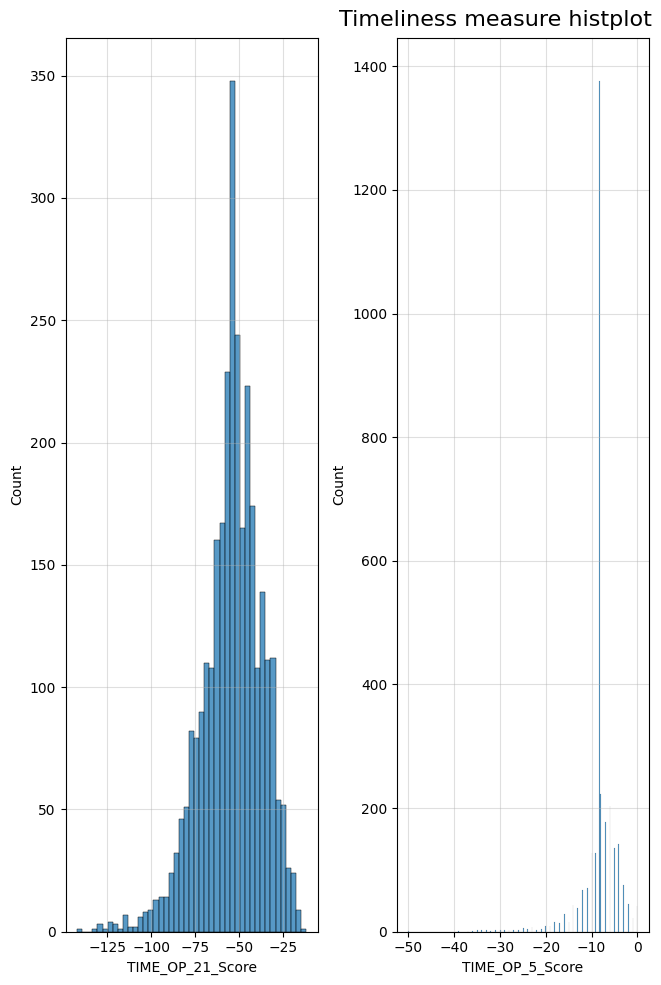

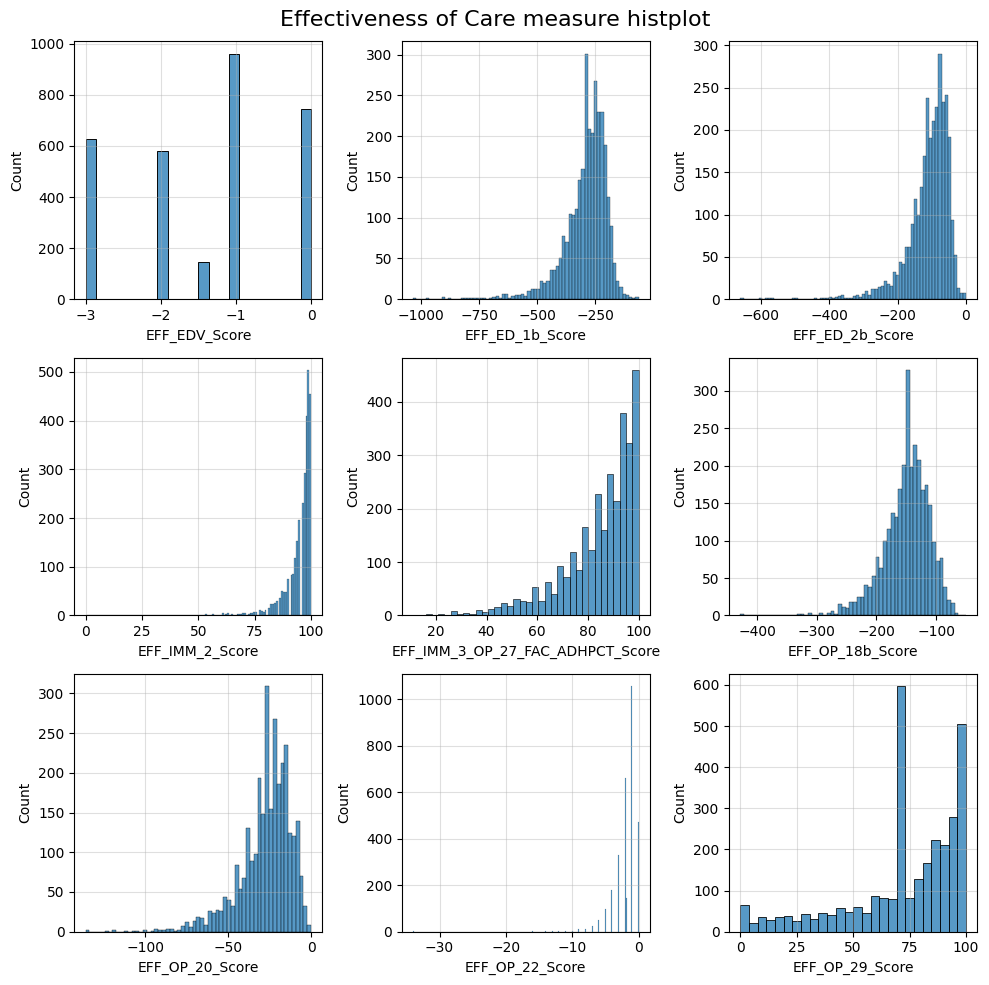

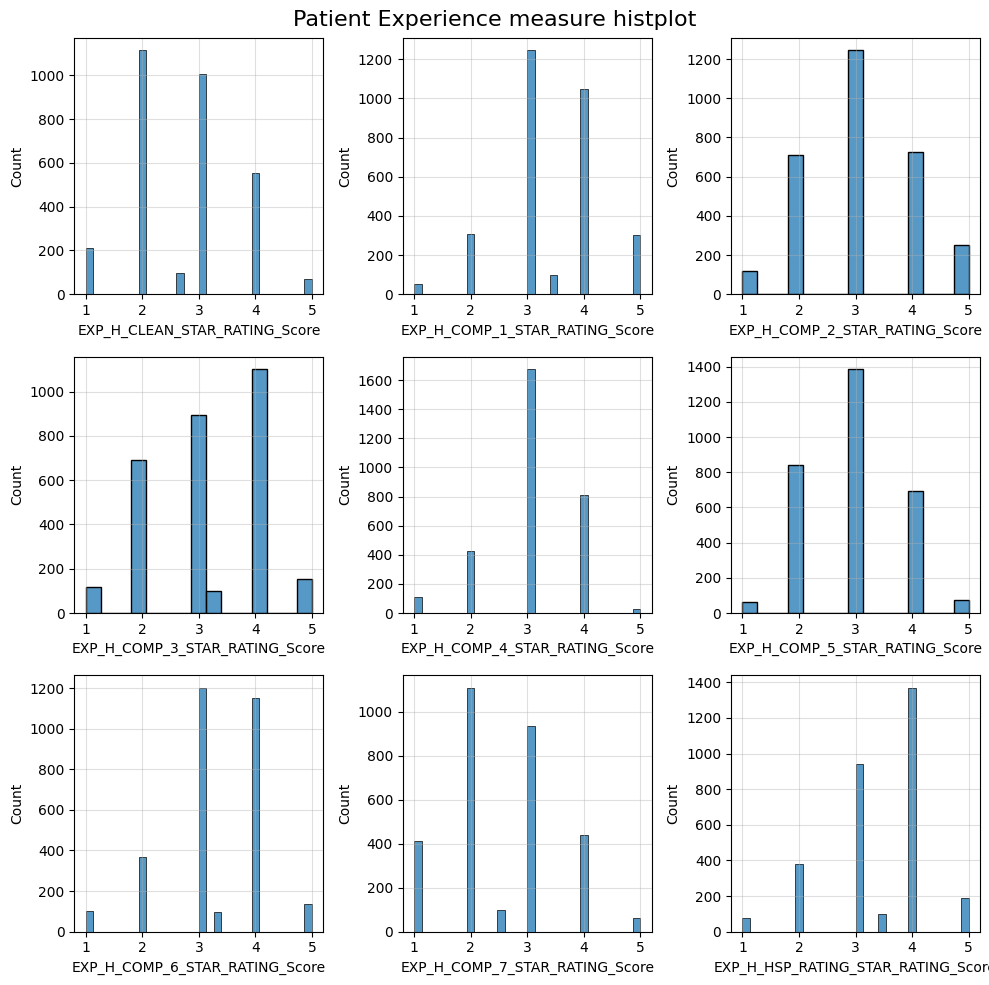

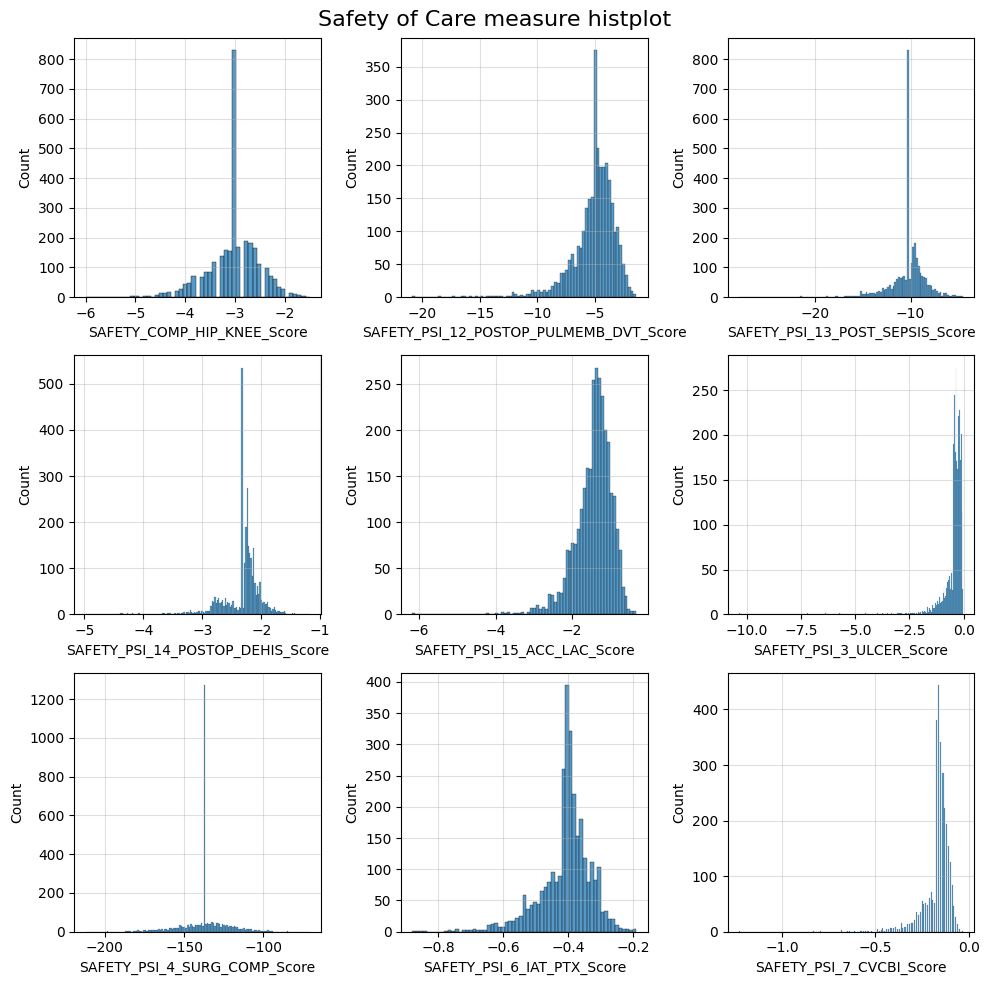

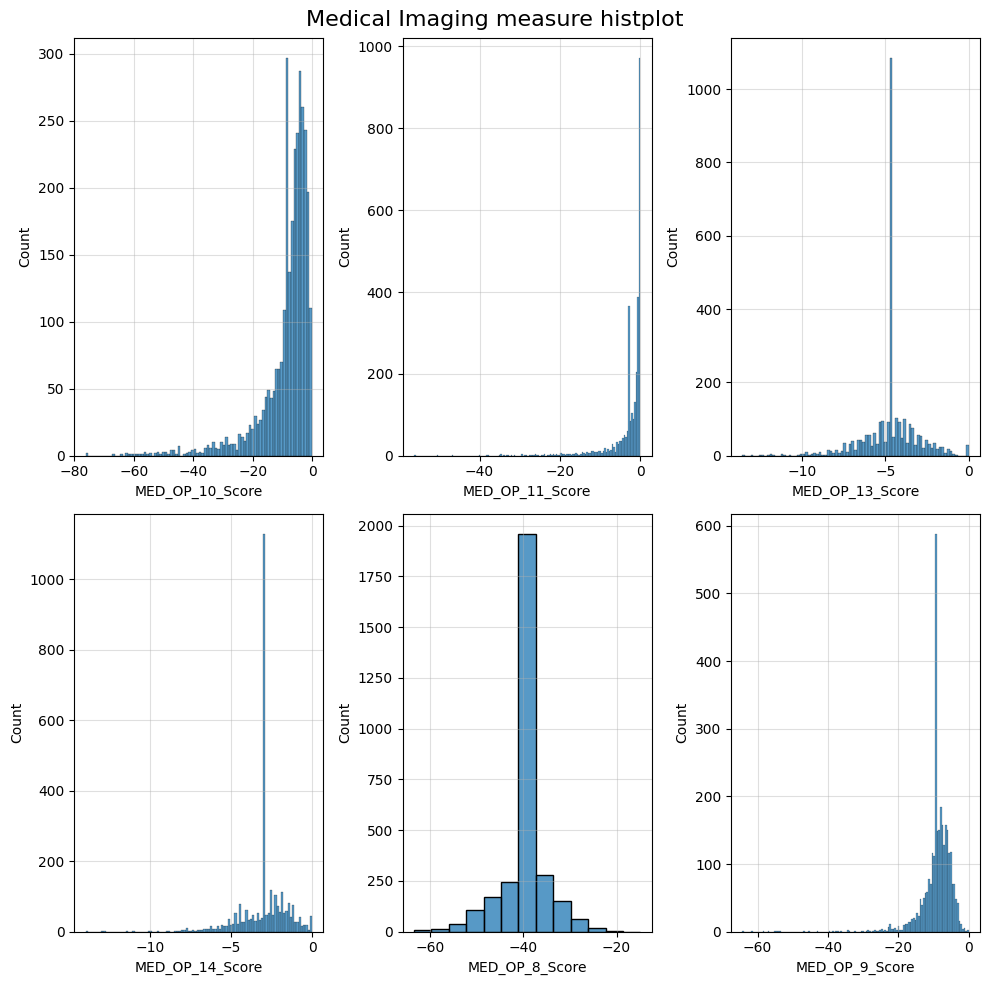

In [22]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

# Iterate over each measure and its columns
for measure, columns in measure_columns.items():
    num_cols = len(columns)
    num_plots = min(num_cols, rows * cols)
    num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

    # Create a new figure for the measure
    fig = plt.figure(figsize=(10, 10))

    # Iterate over each column of the measure
    for i, col in enumerate(columns[:num_plots]):
        # Create subplot
        plt.subplot(num_rows, cols, i + 1)
        
        # Plot histogram
        ax = sns.histplot(df[col])
        ax.grid(alpha=0.4)
        
        # Set title for each subplot
        fig.suptitle(col)
        
    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.suptitle(f'{measure} measure histplot', fontsize=16)
    plt.show()

### b. KDE plot

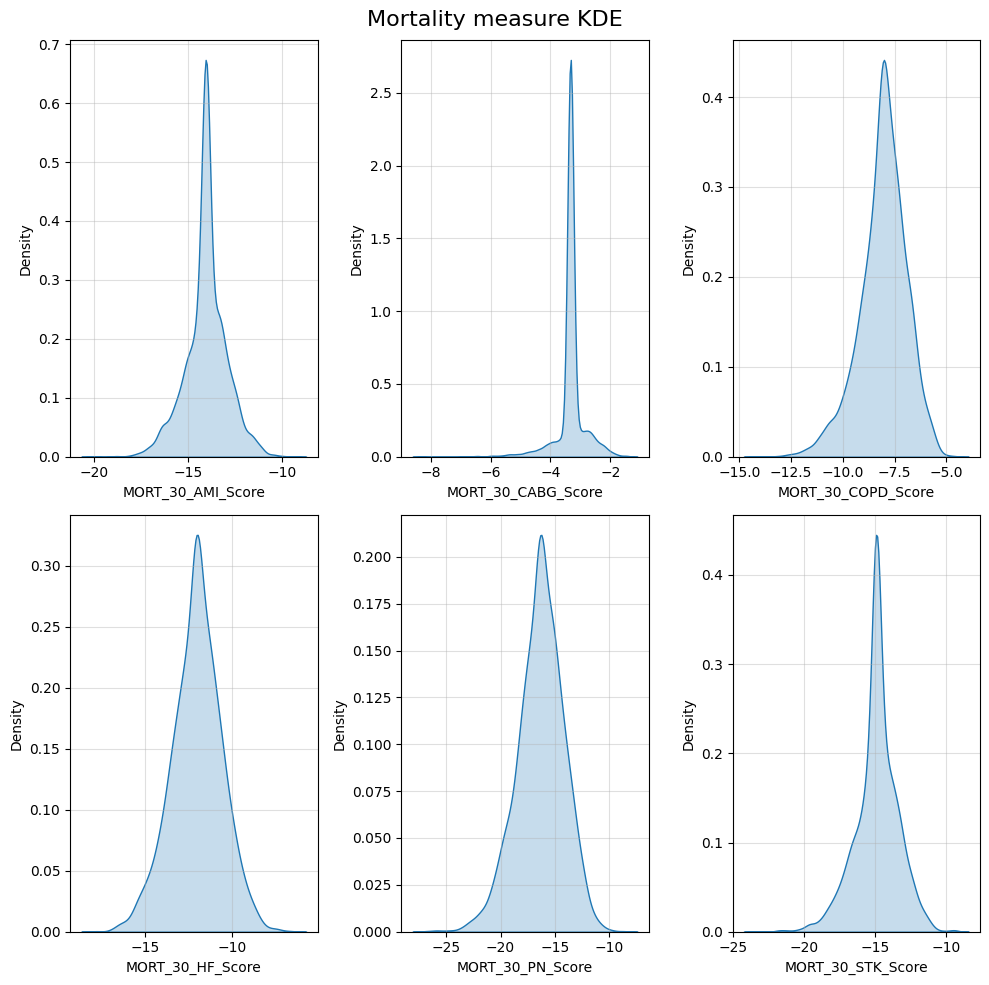

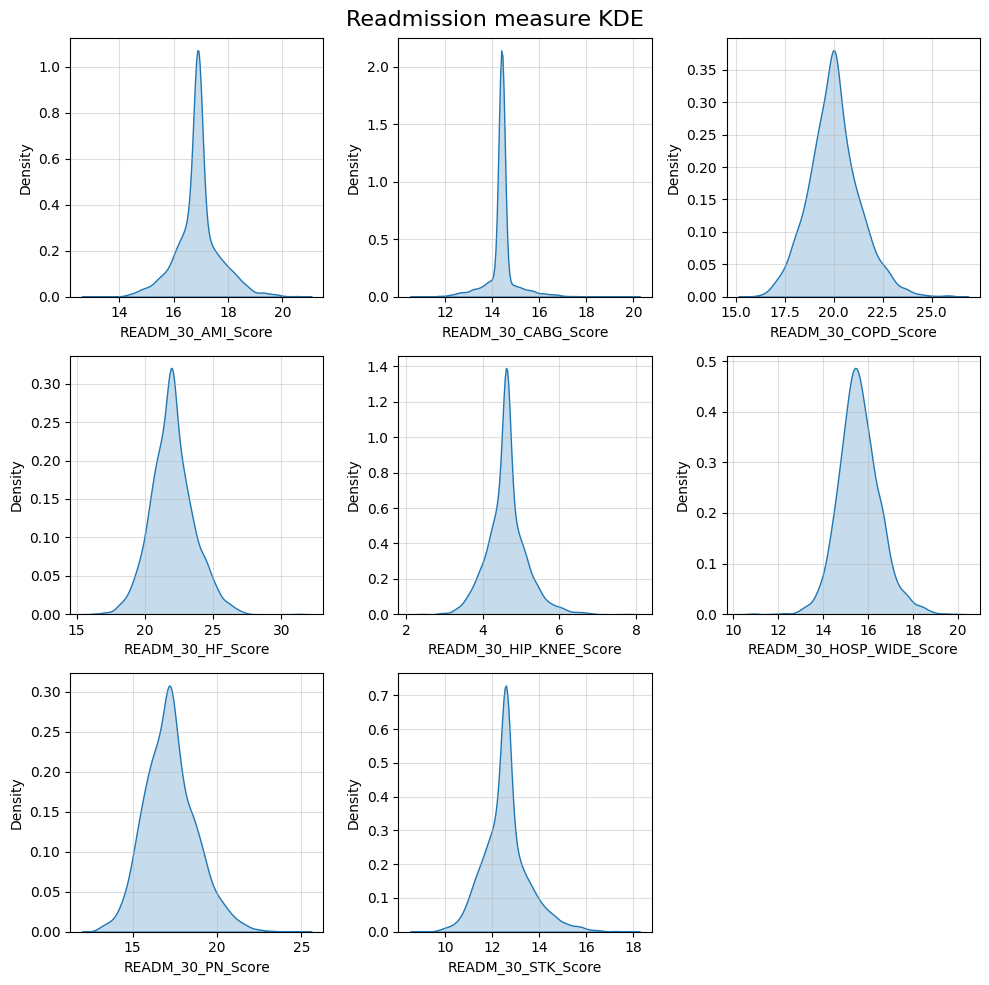

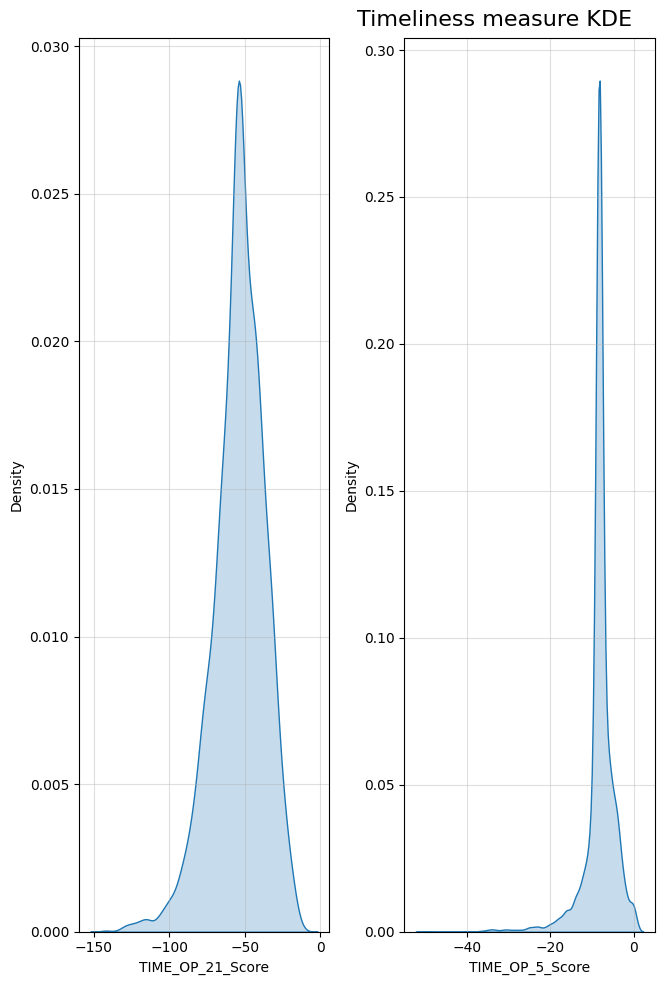

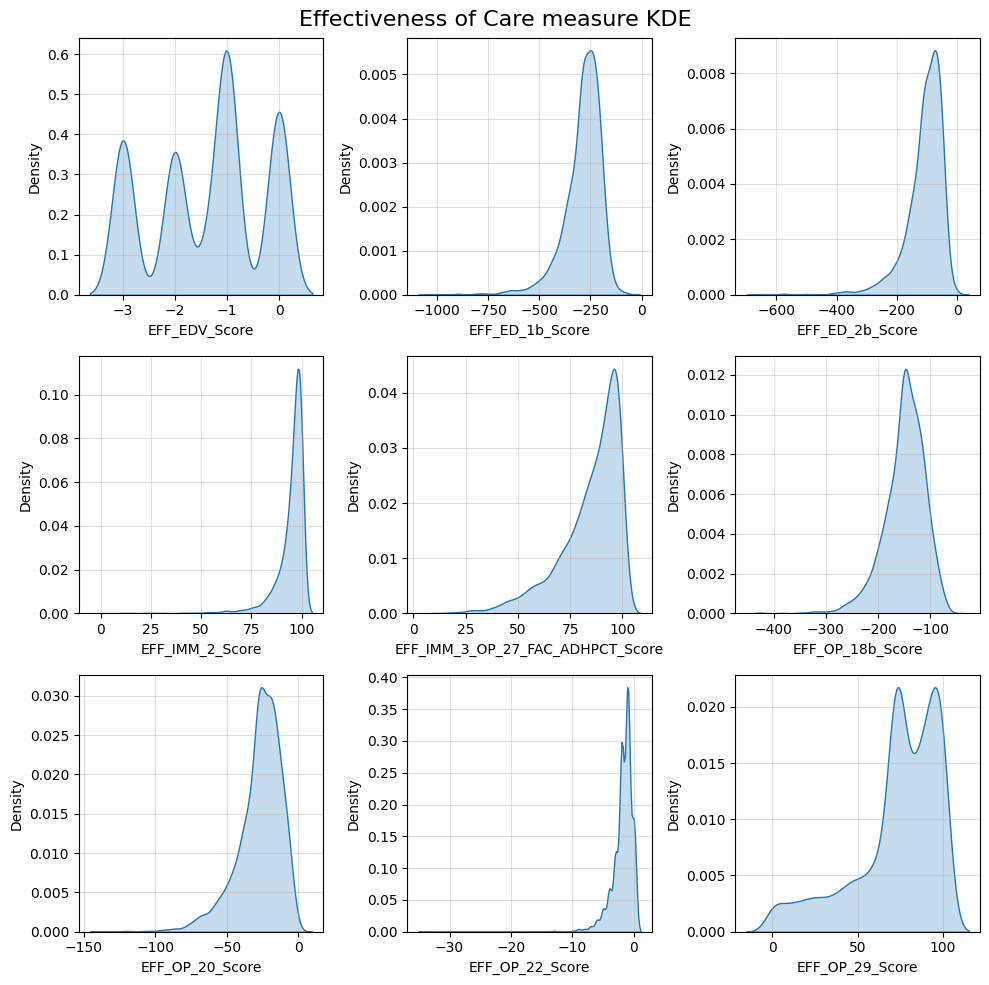

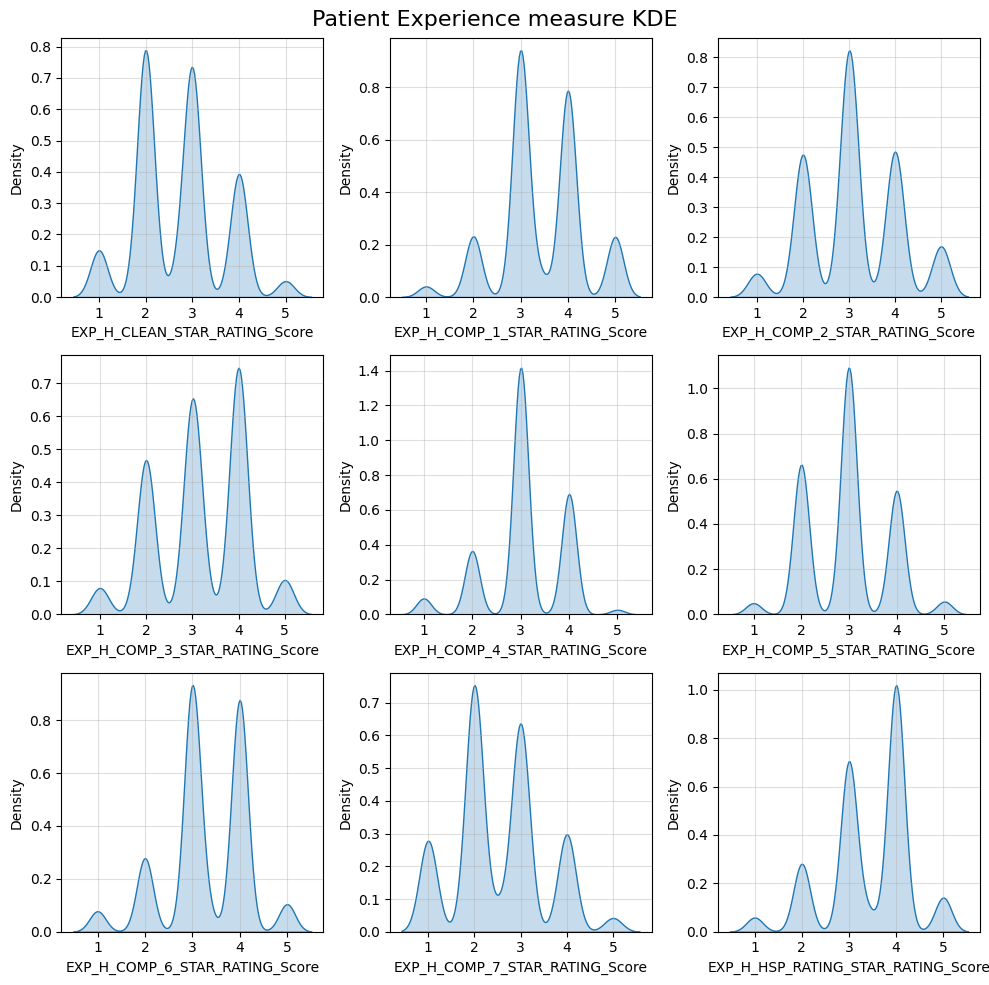

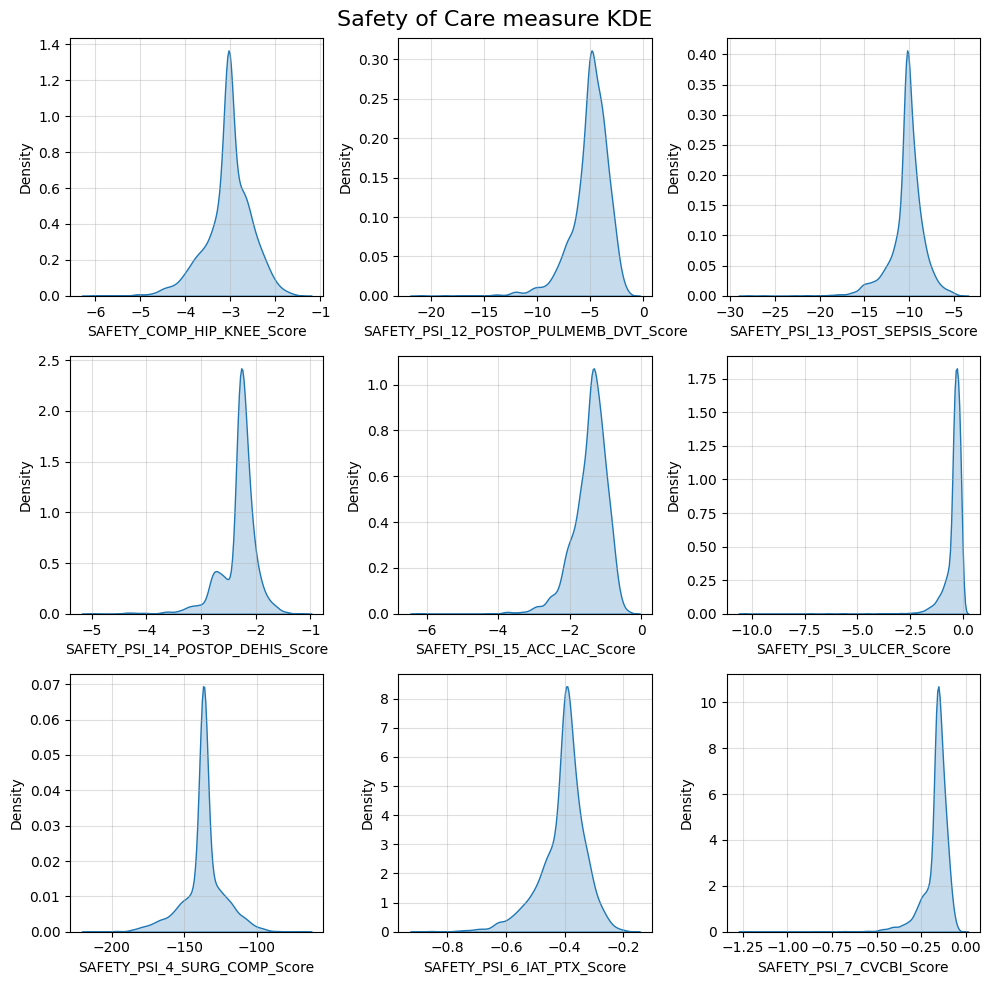

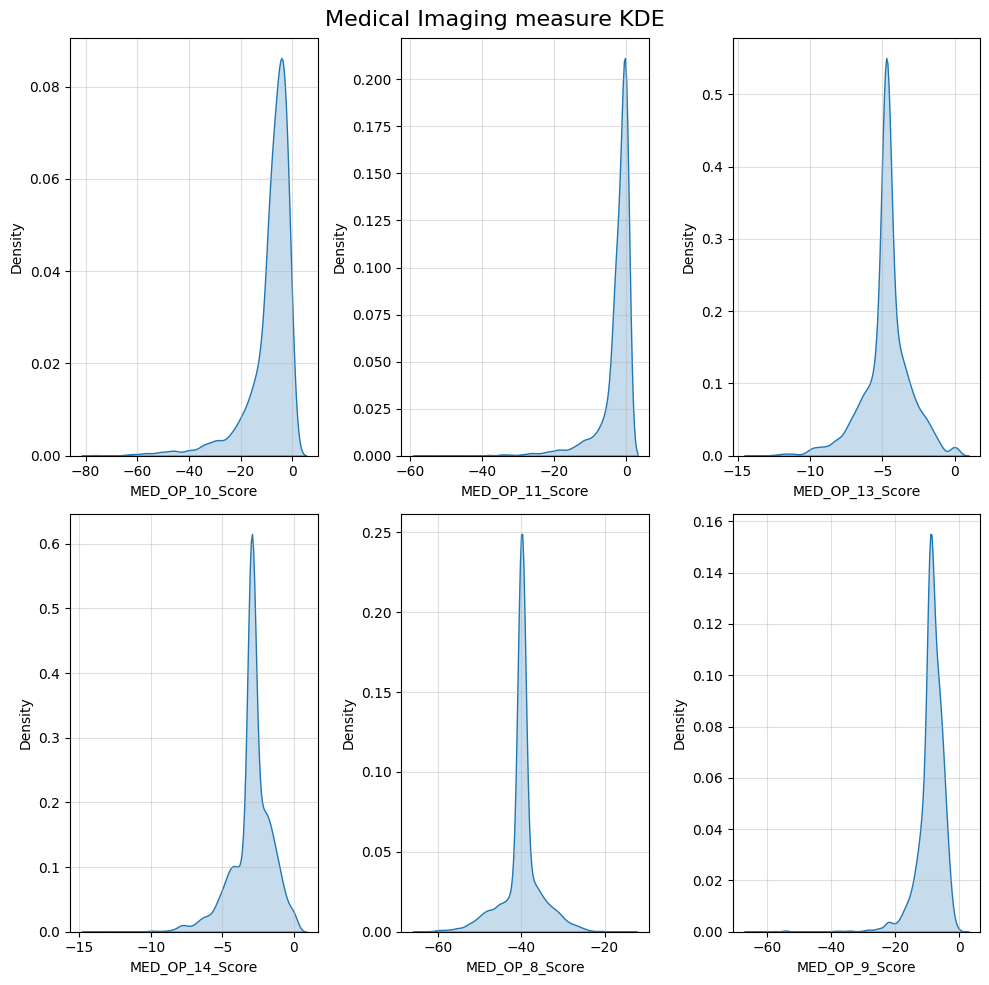

In [23]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

# Iterate over each measure and its columns
for measure, columns in measure_columns.items():
    num_cols = len(columns)
    num_plots = min(num_cols, rows * cols)
    num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

    # Create a new figure for the measure
    fig = plt.figure(figsize=(10, 10))

    # Iterate over each column of the measure
    for i, col in enumerate(columns[:num_plots]):
        # Create subplot
        plt.subplot(num_rows, cols, i + 1)
        
        # Plot histogram
        ax = sns.kdeplot(df[col], fill=True)
        ax.grid(alpha=0.4)
        
        # Set title for each subplot
        fig.suptitle(col)
        
    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.suptitle(f'{measure} measure KDE', fontsize=16)
    plt.show()

### c. Boxplot

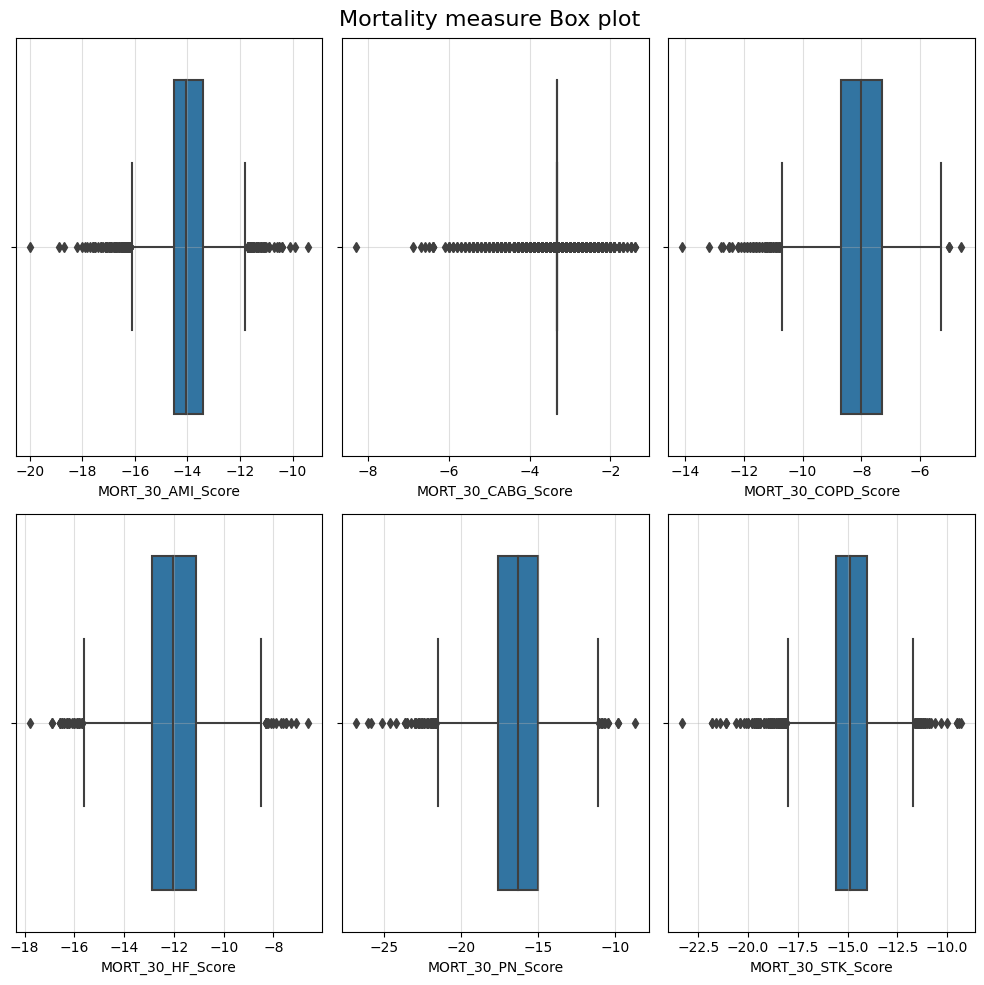

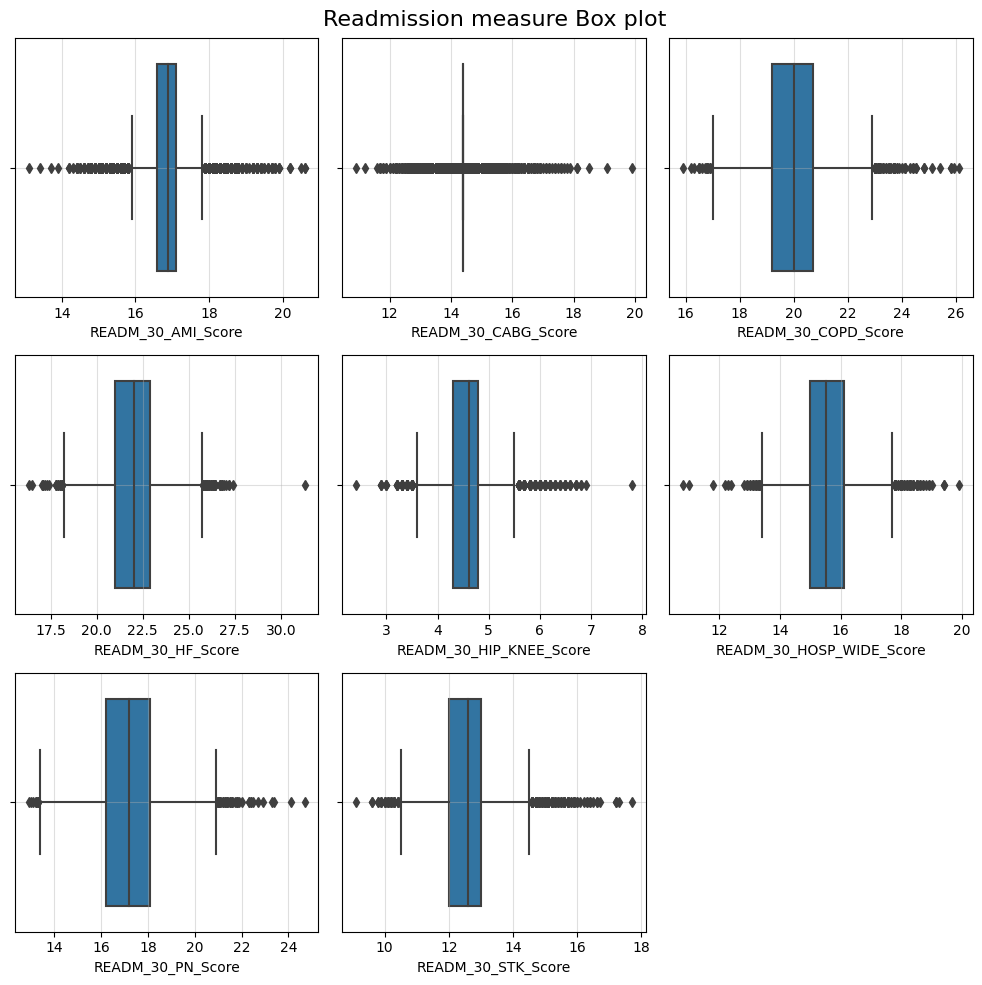

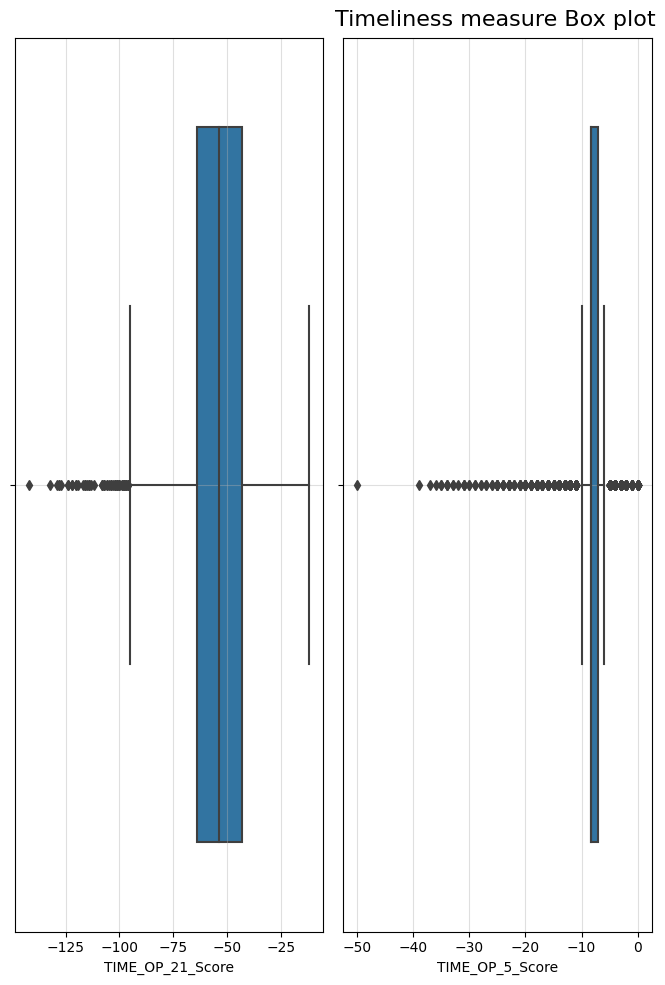

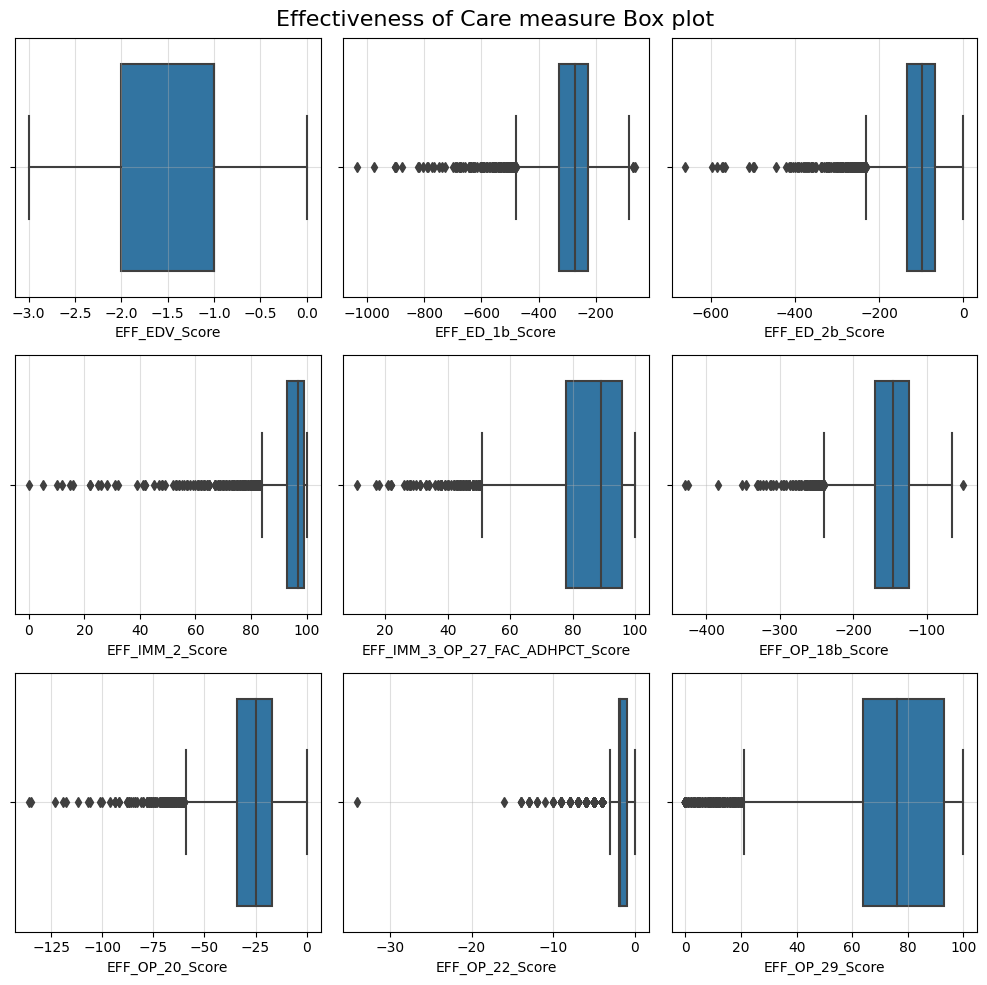

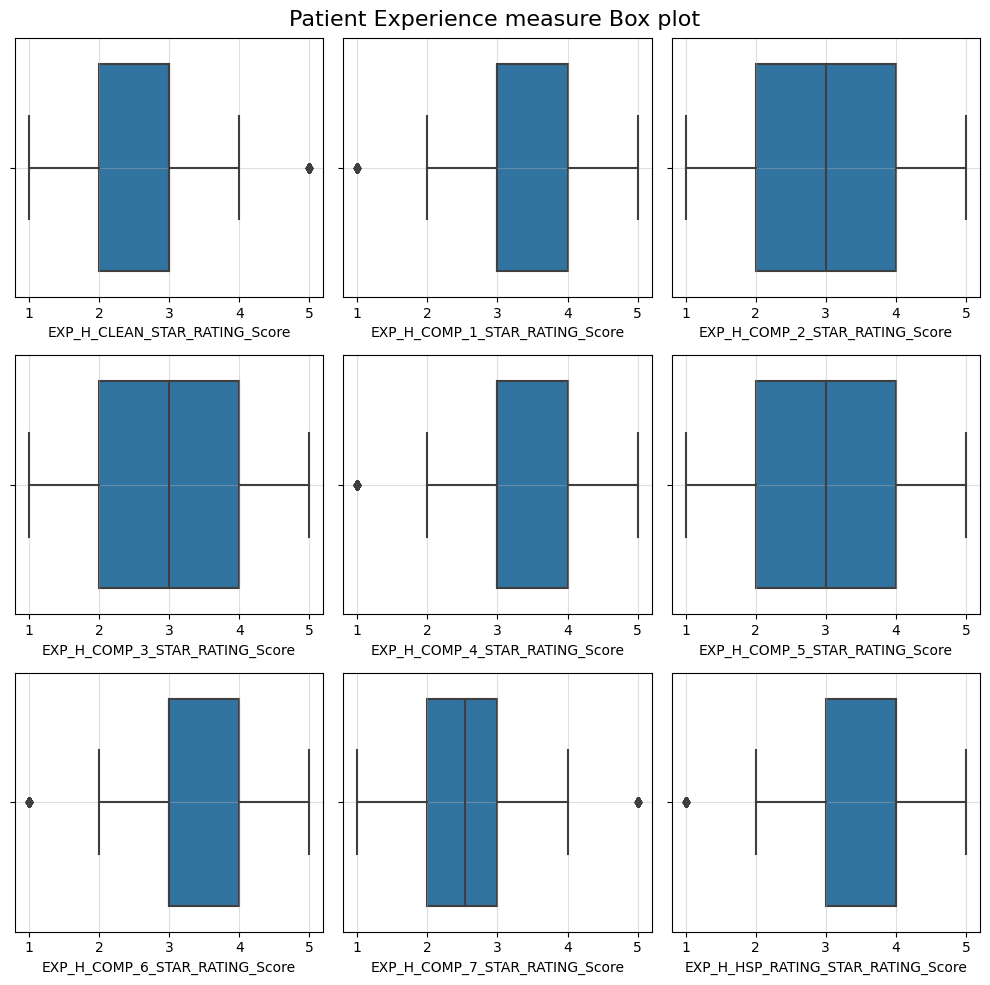

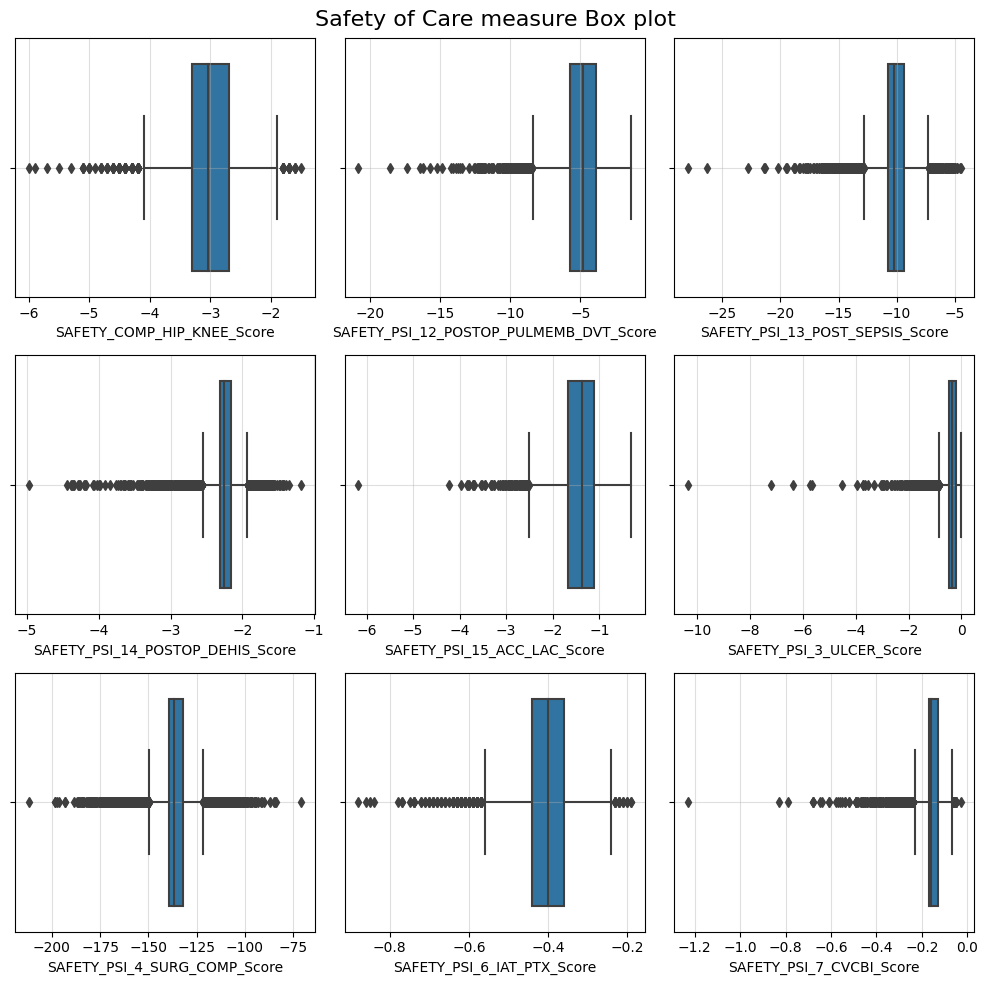

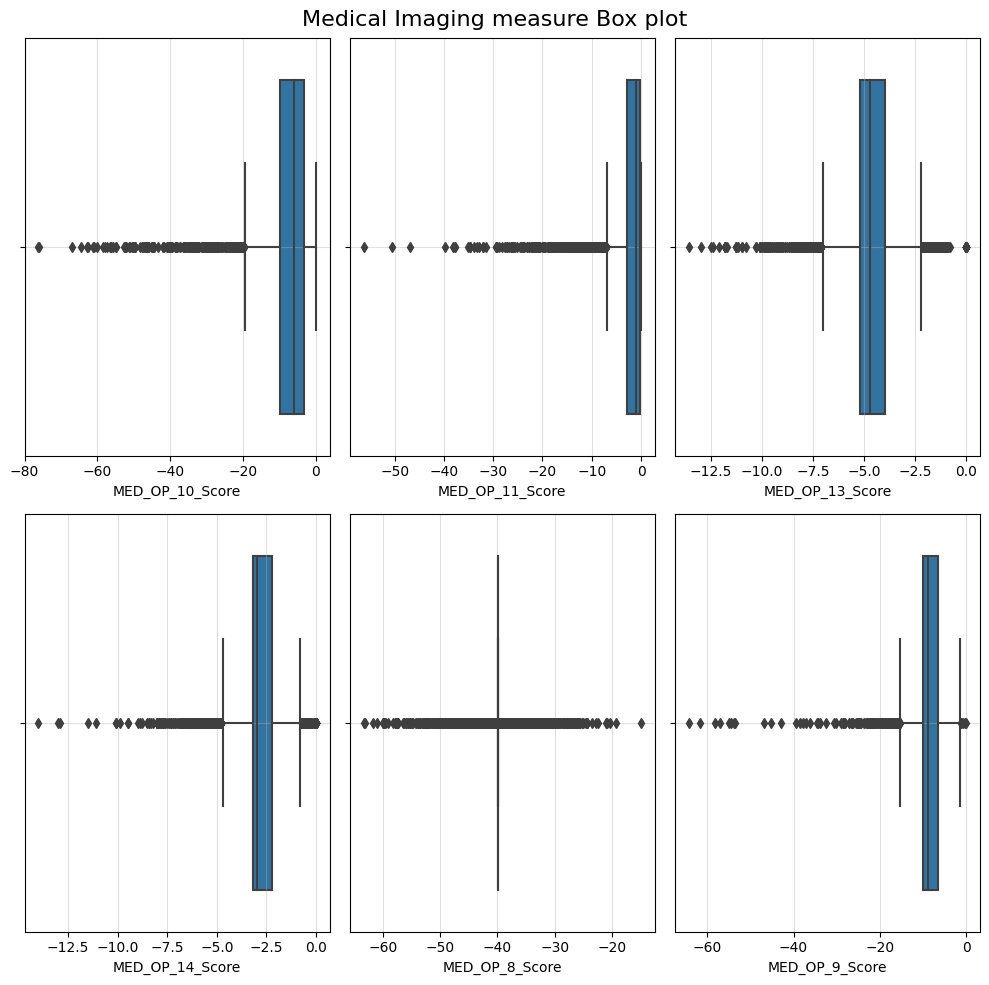

In [24]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

# Iterate over each measure and its columns
for measure, columns in measure_columns.items():
    num_cols = len(columns)
    num_plots = min(num_cols, rows * cols)
    num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

    # Create a new figure for the measure
    fig = plt.figure(figsize=(10, 10))

    # Iterate over each column of the measure
    for i, col in enumerate(columns[:num_plots]):
        # Create subplot
        plt.subplot(num_rows, cols, i + 1)
        
        # Plot histogram
        ax = sns.boxplot(x=df[col])
        ax.grid(alpha=0.4)
        
        # Set title for each subplot
        fig.suptitle(col)
        
    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.suptitle(f'{measure} measure Box plot', fontsize=16)
    plt.show()

### Bivariate / Multivariate Analysis.

### 1. Scatterplot

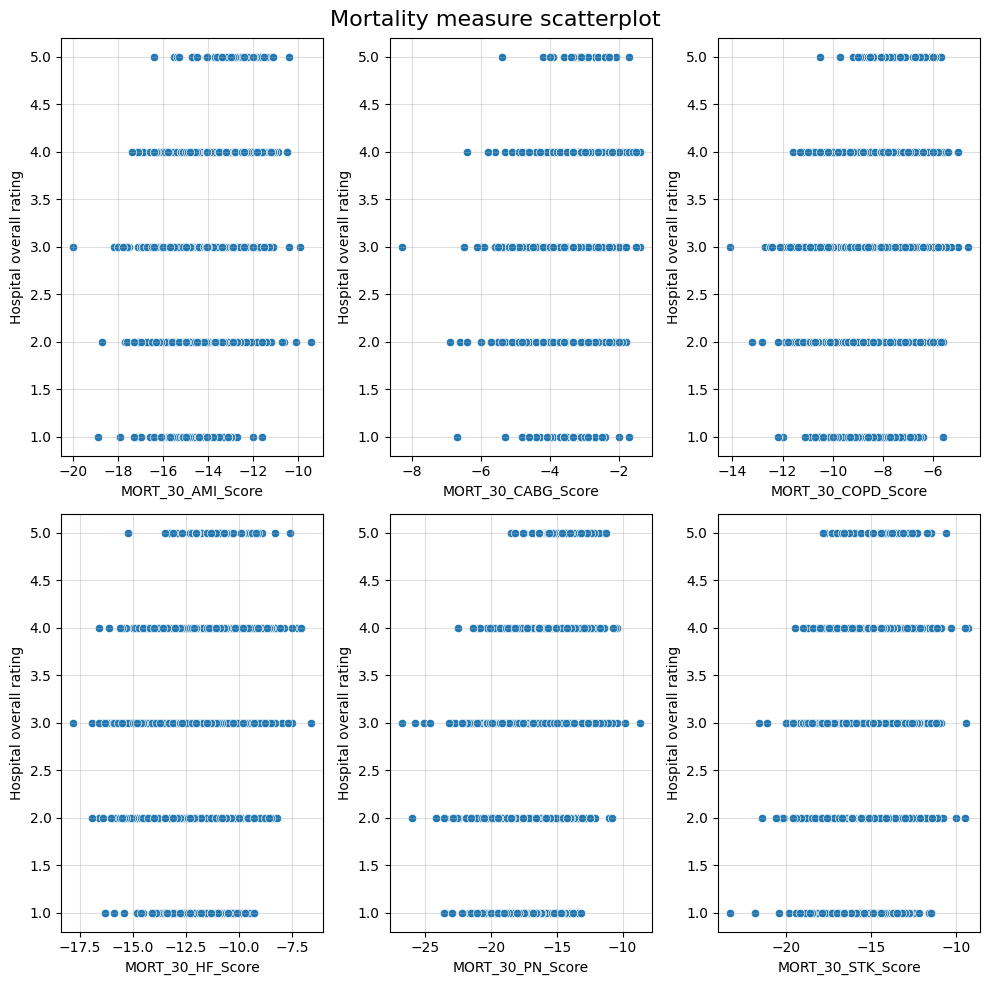

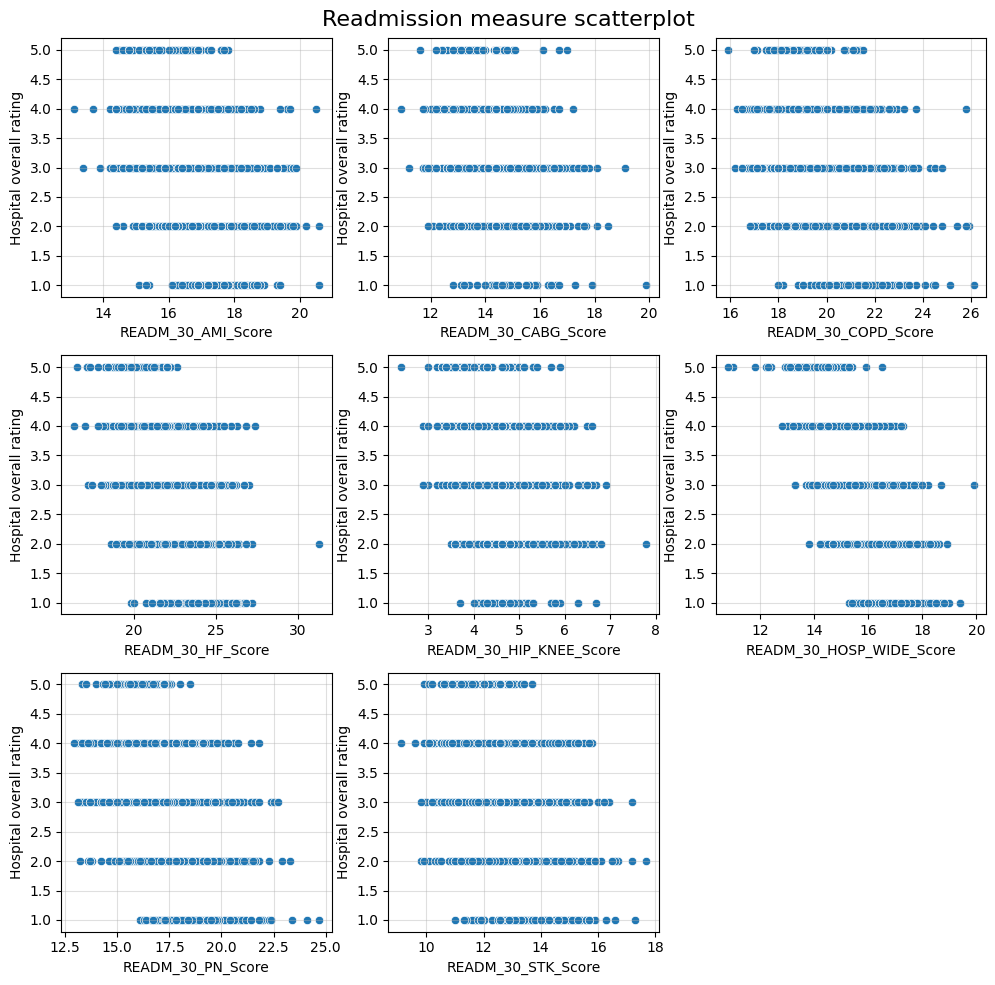

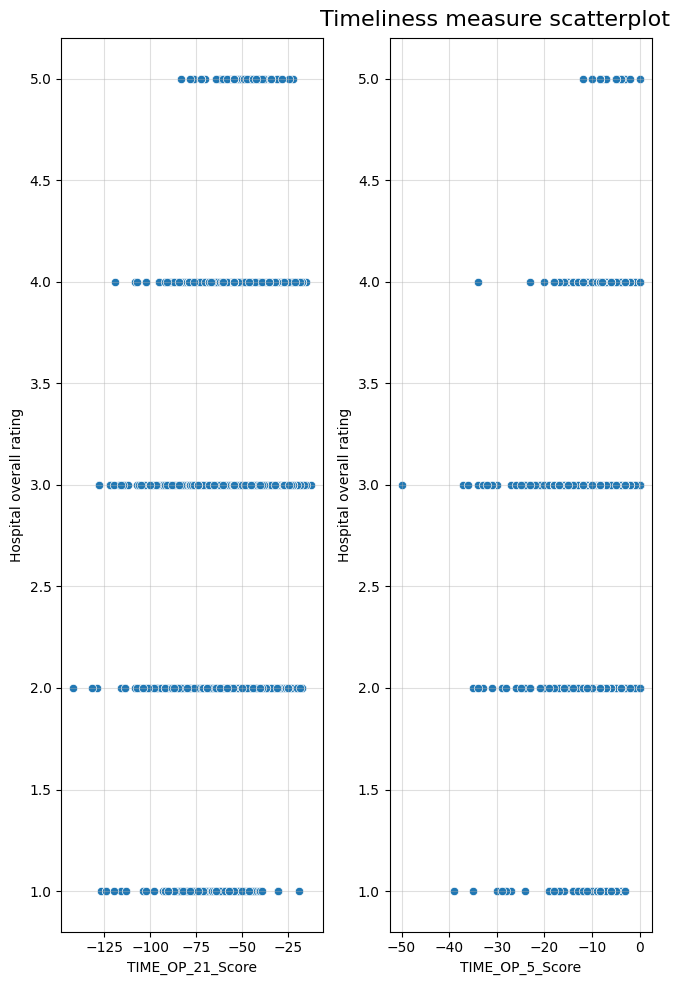

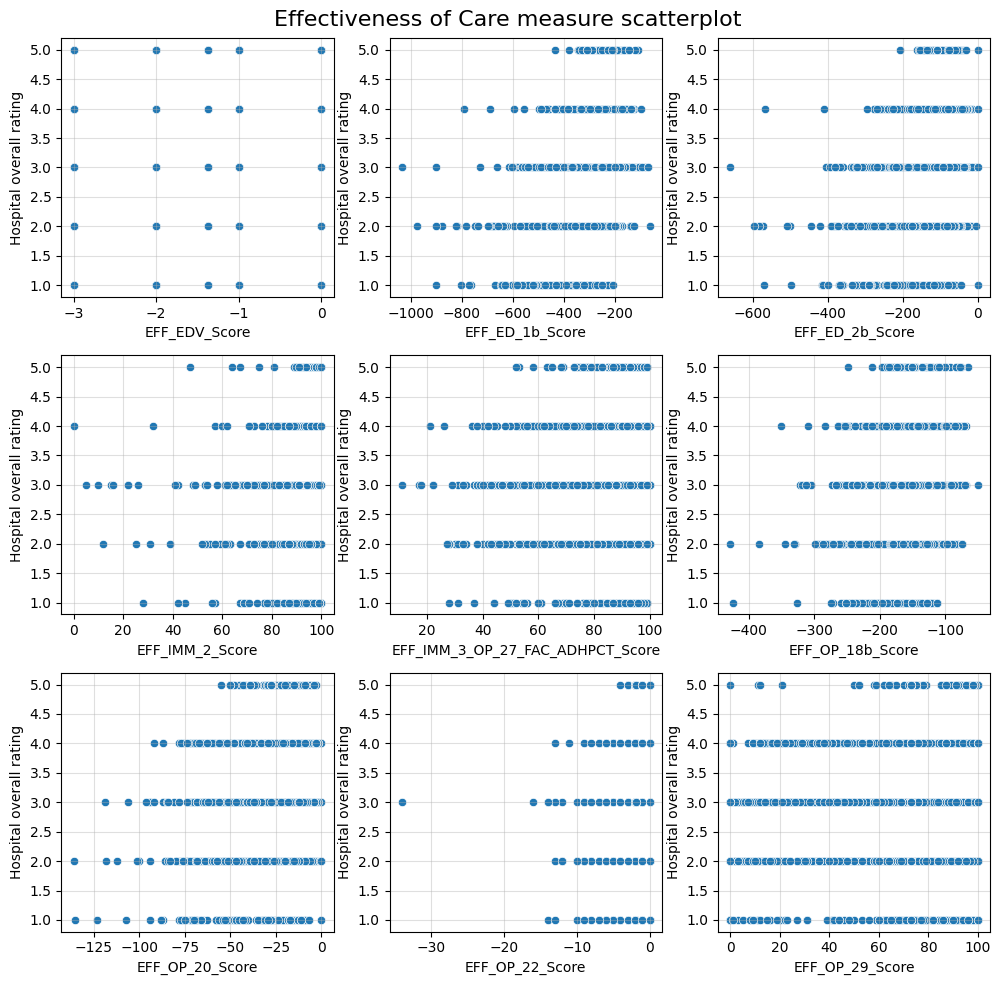

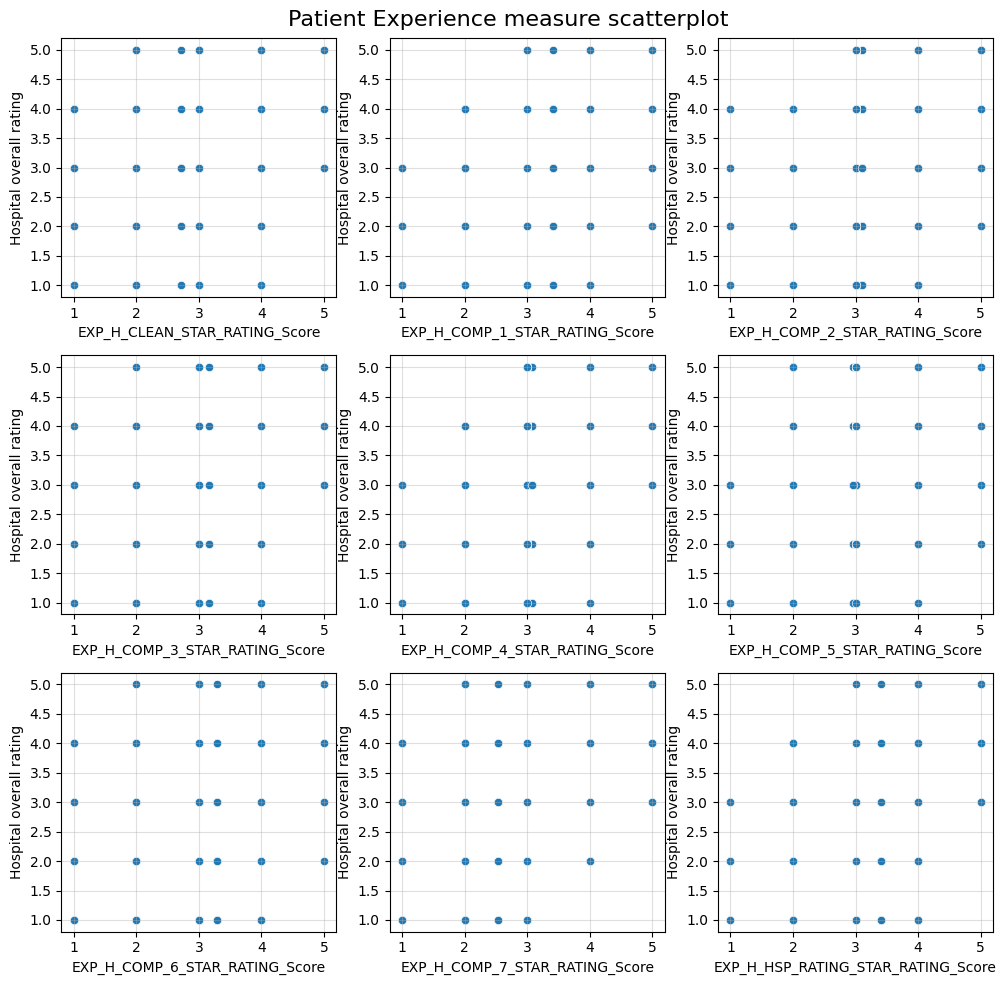

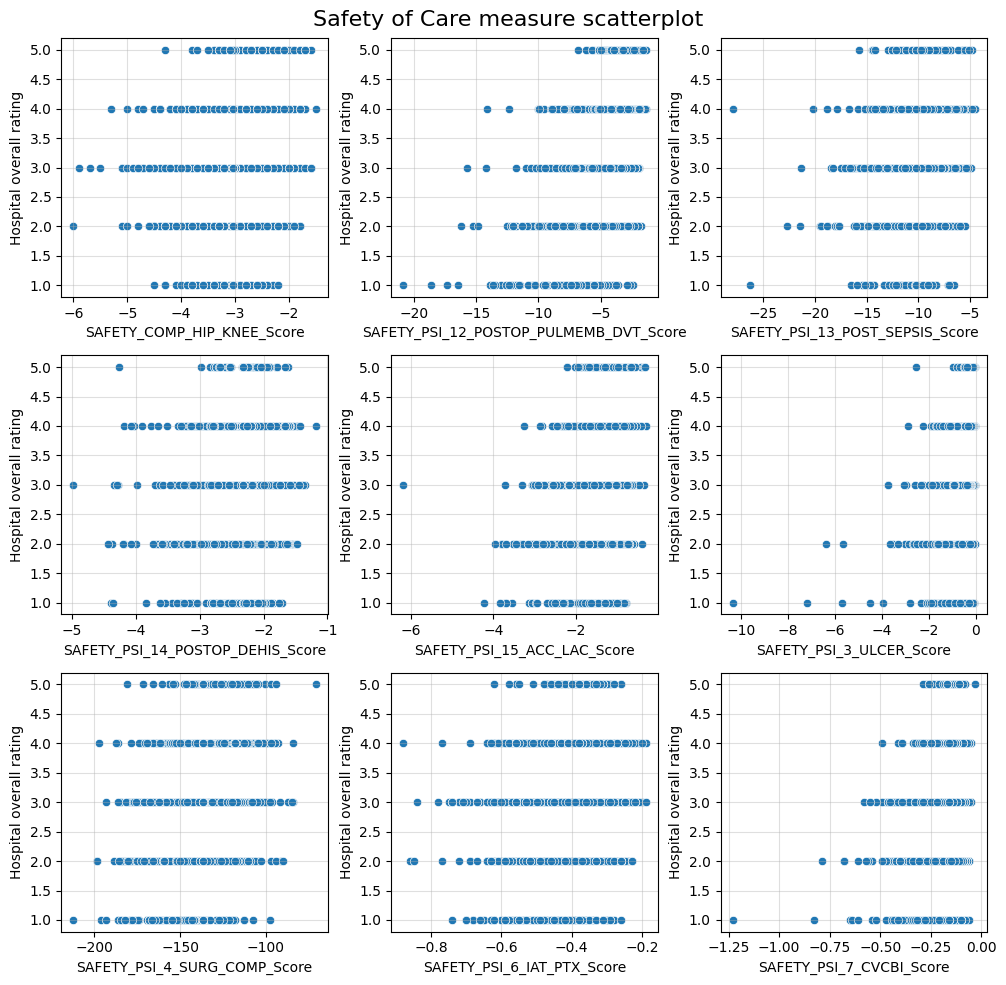

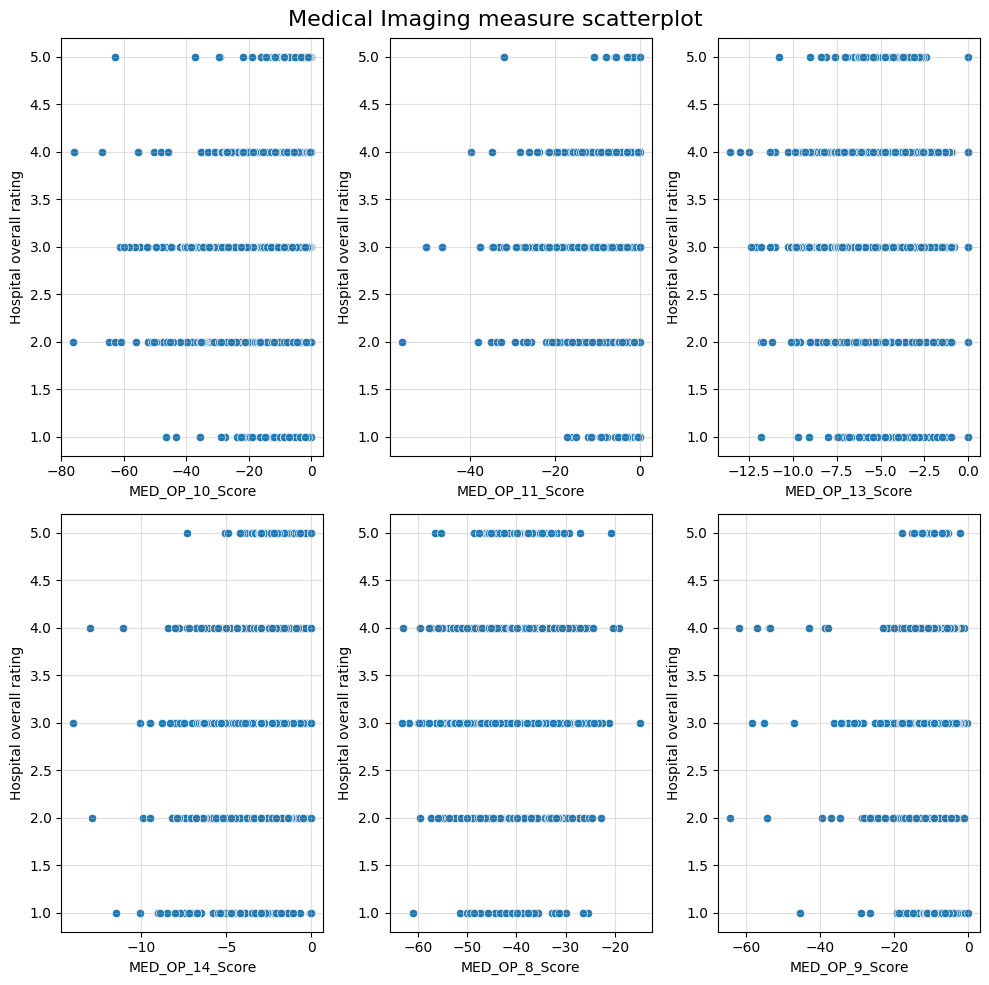

In [25]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

# Iterate over each measure and its columns
for measure, columns in measure_columns.items():
    num_cols = len(columns)
    num_plots = min(num_cols, rows * cols)
    num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

    # Create a new figure for the measure
    fig = plt.figure(figsize=(10, 10))

    # Iterate over each column of the measure
    for i, col in enumerate(columns[:num_plots]):
        # Create subplot
        plt.subplot(num_rows, cols, i + 1)
        
        # Plot histogram
        ax = sns.scatterplot(data=df, x=df[col], y='Hospital overall rating')
        ax.grid(alpha=0.4)
        
        # Set title for each subplot
        fig.suptitle(col)
        
    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.suptitle(f'{measure} measure scatterplot', fontsize=16)
    plt.show()


plt.show()

### Lineplot Between Sub Measures and Hospital overall rating.

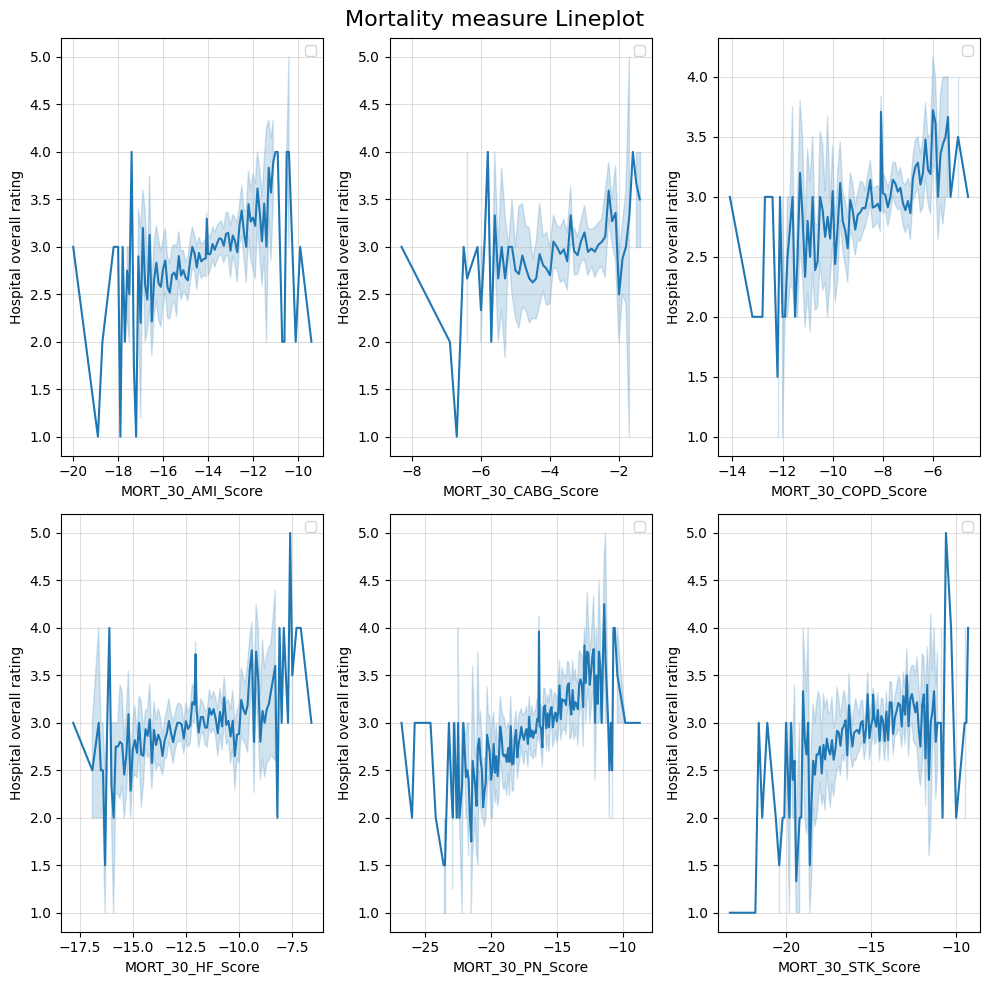

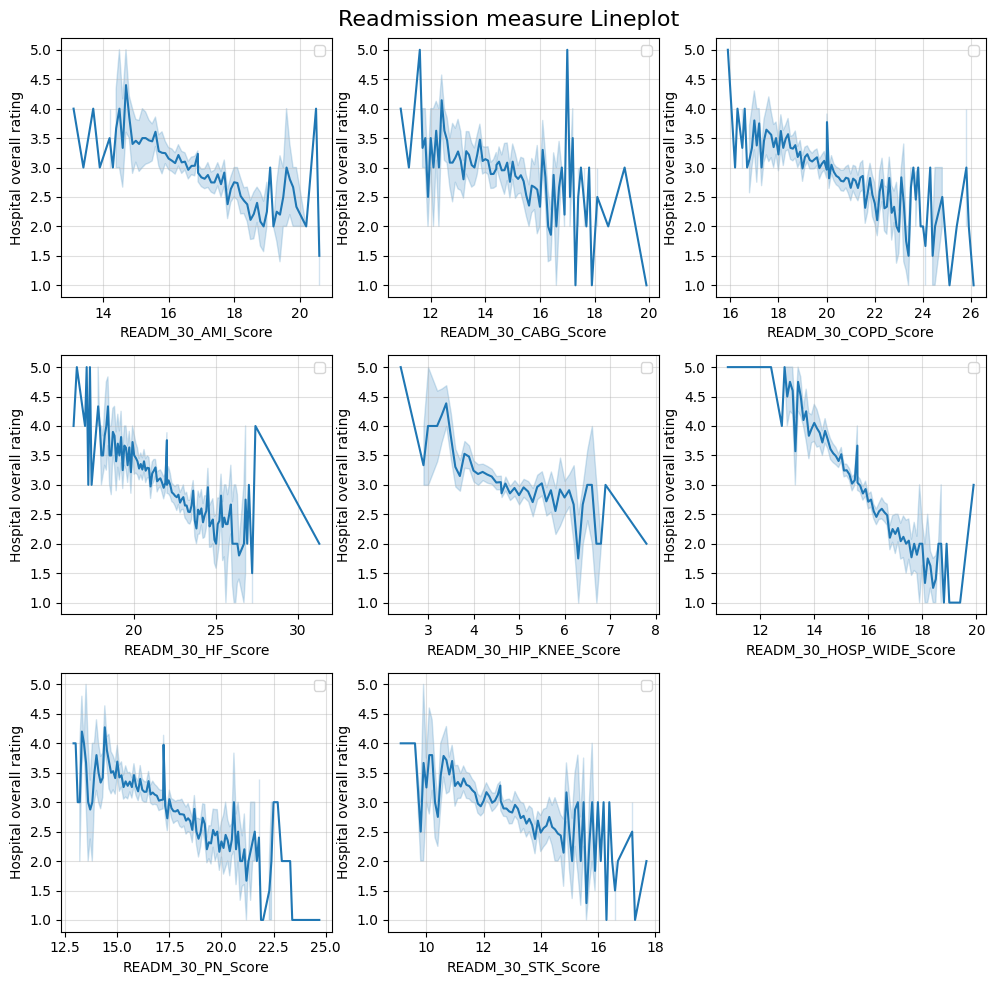

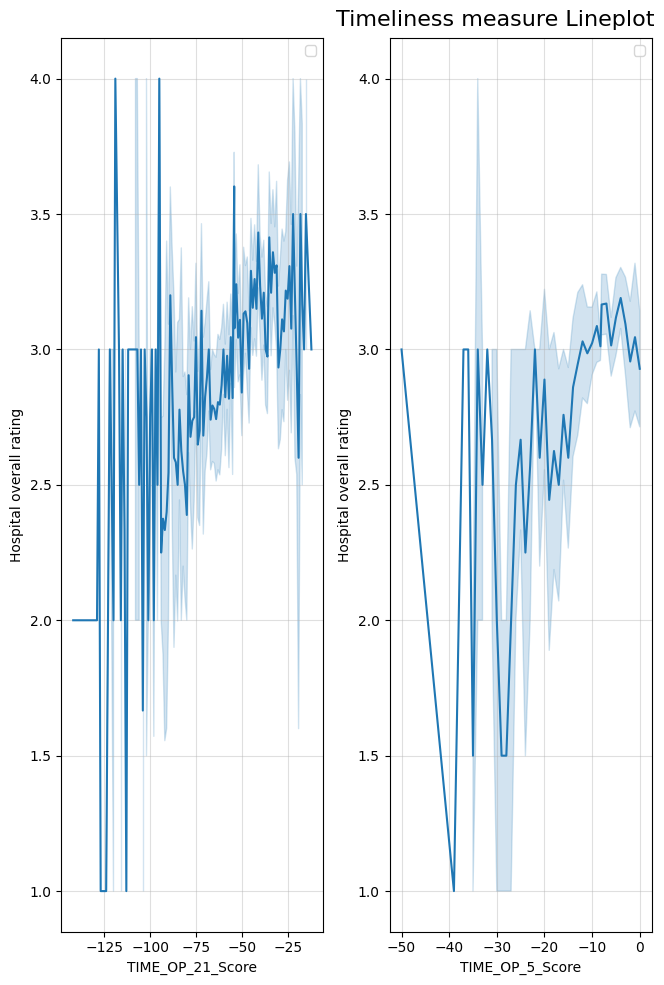

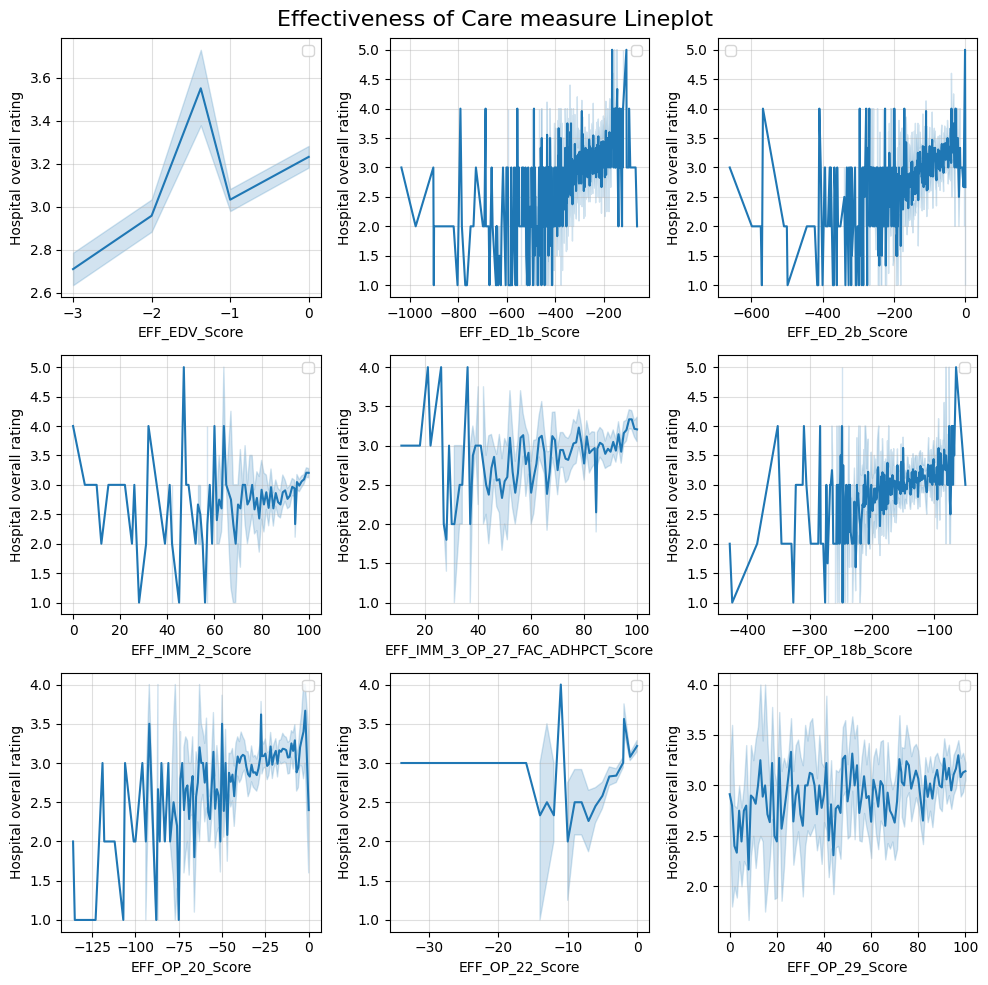

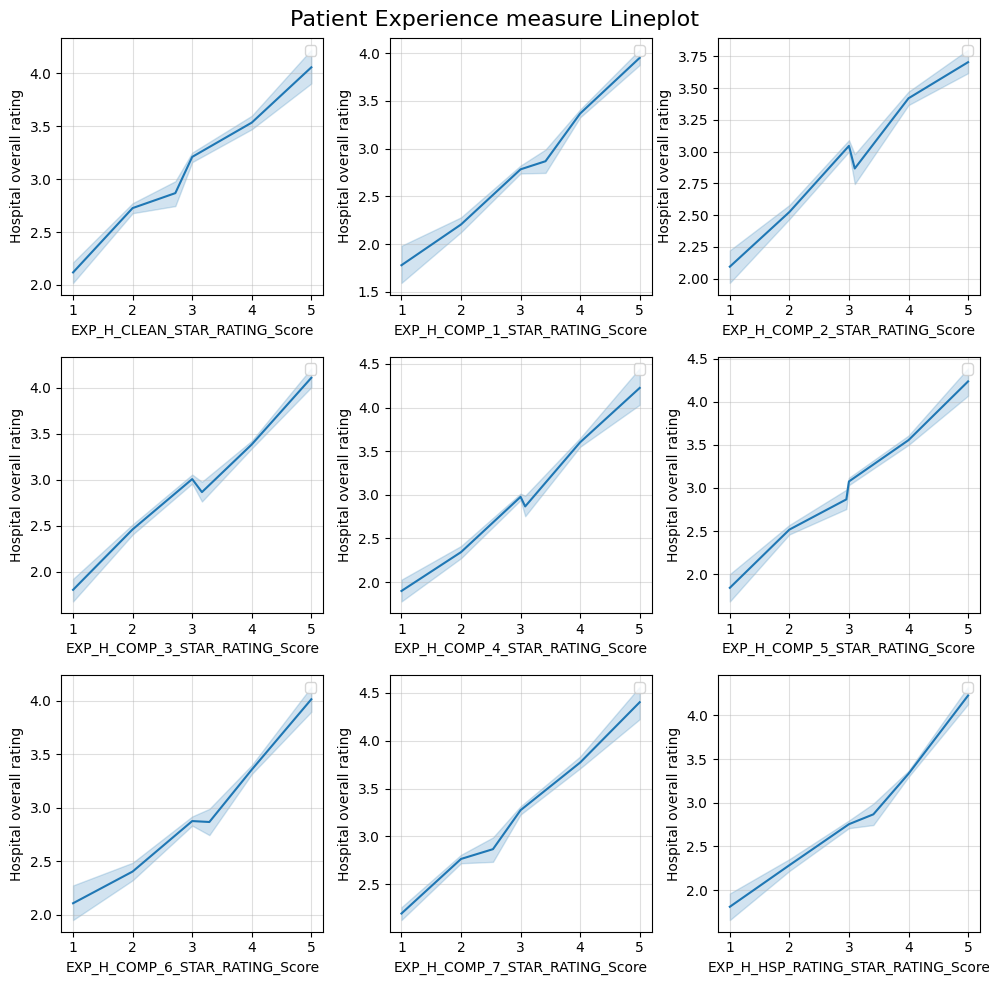

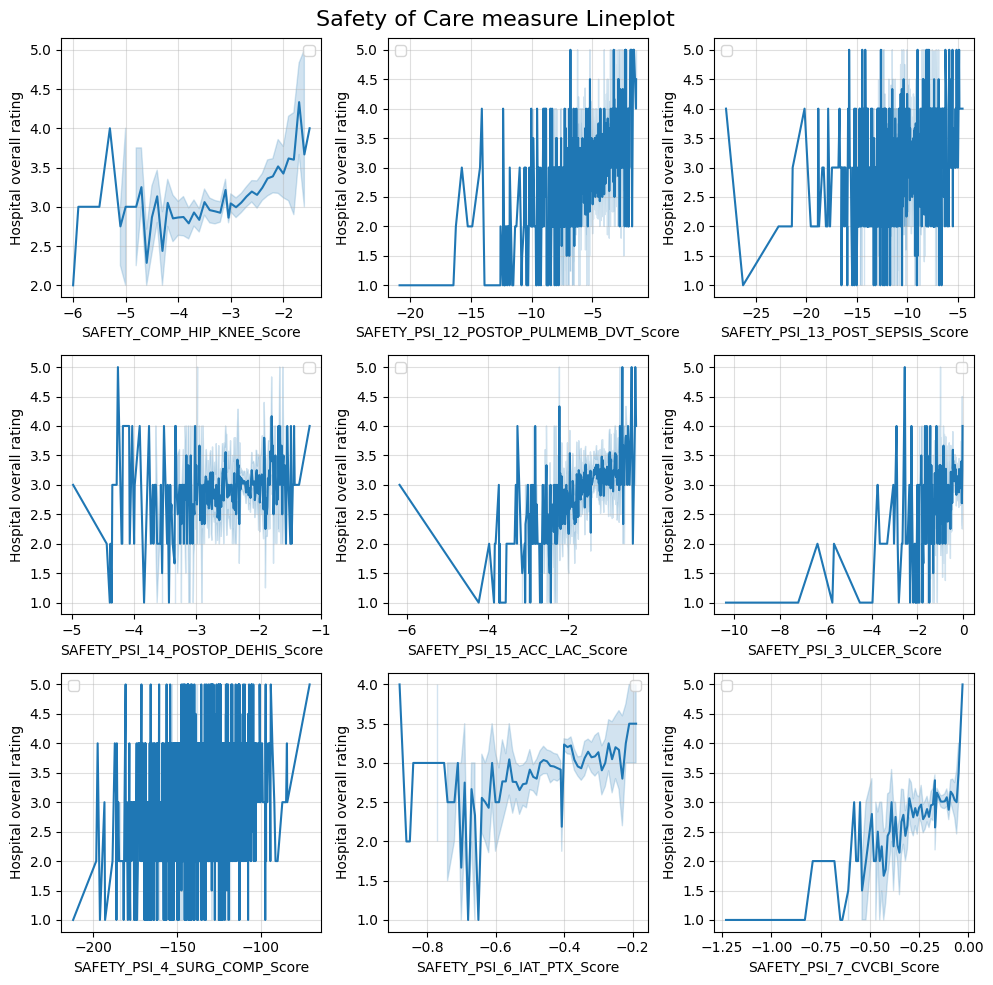

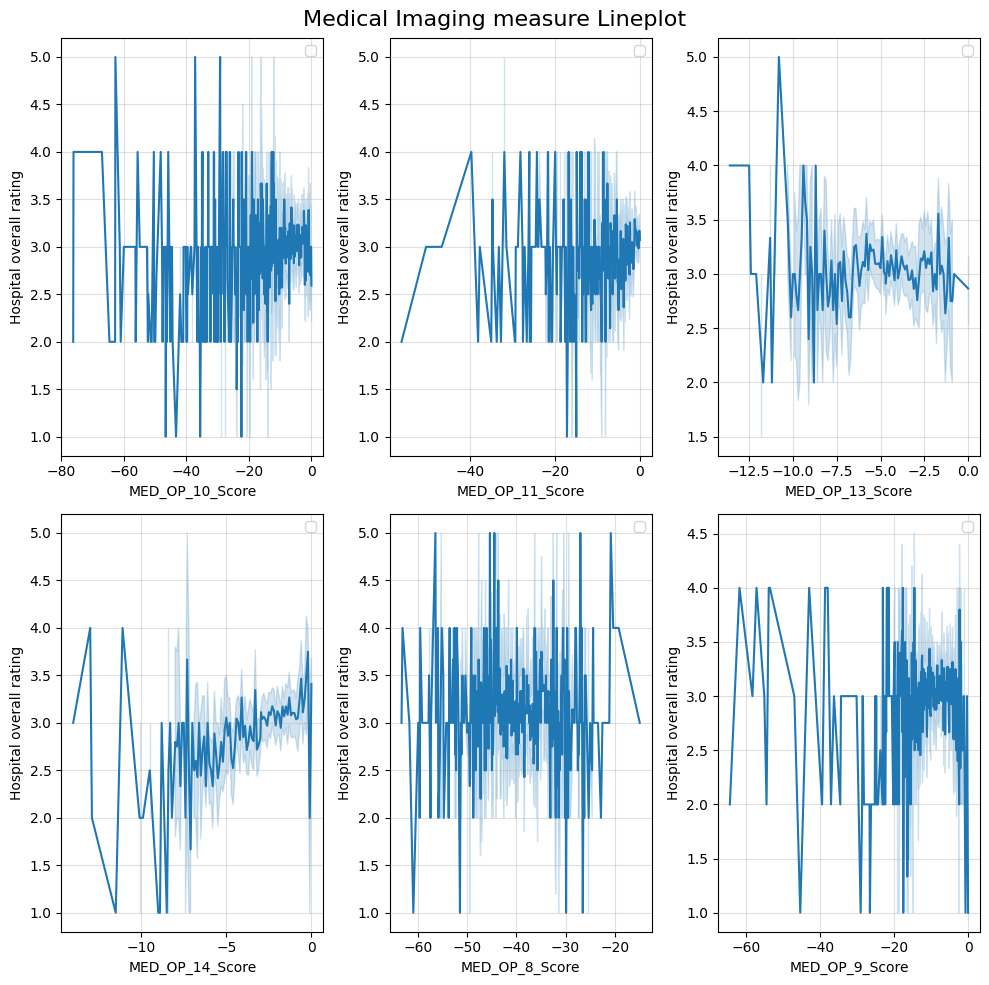

In [154]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

# Iterate over each measure and its columns
for measure, columns in measure_columns.items():
    num_cols = len(columns)
    num_plots = min(num_cols, rows * cols)
    num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

    # Create a new figure for the measure
    fig = plt.figure(figsize=(10, 10))

    # Iterate over each column of the measure
    for i, col in enumerate(columns[:num_plots]):
        # Create subplot
        plt.subplot(num_rows, cols, i + 1)
        
        # Plot histogram
        ax = sns.lineplot(data=df, y='Hospital overall rating', x=df[col])
        ax.grid(alpha=0.4)
        
        # Set title for each subplot
        fig.suptitle(col)
        
    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.suptitle(f'{measure} measure Lineplot', fontsize=16)
    plt.show()

### Lineplot Between Main Measures and Hospital overall rating.

In [26]:
main_features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

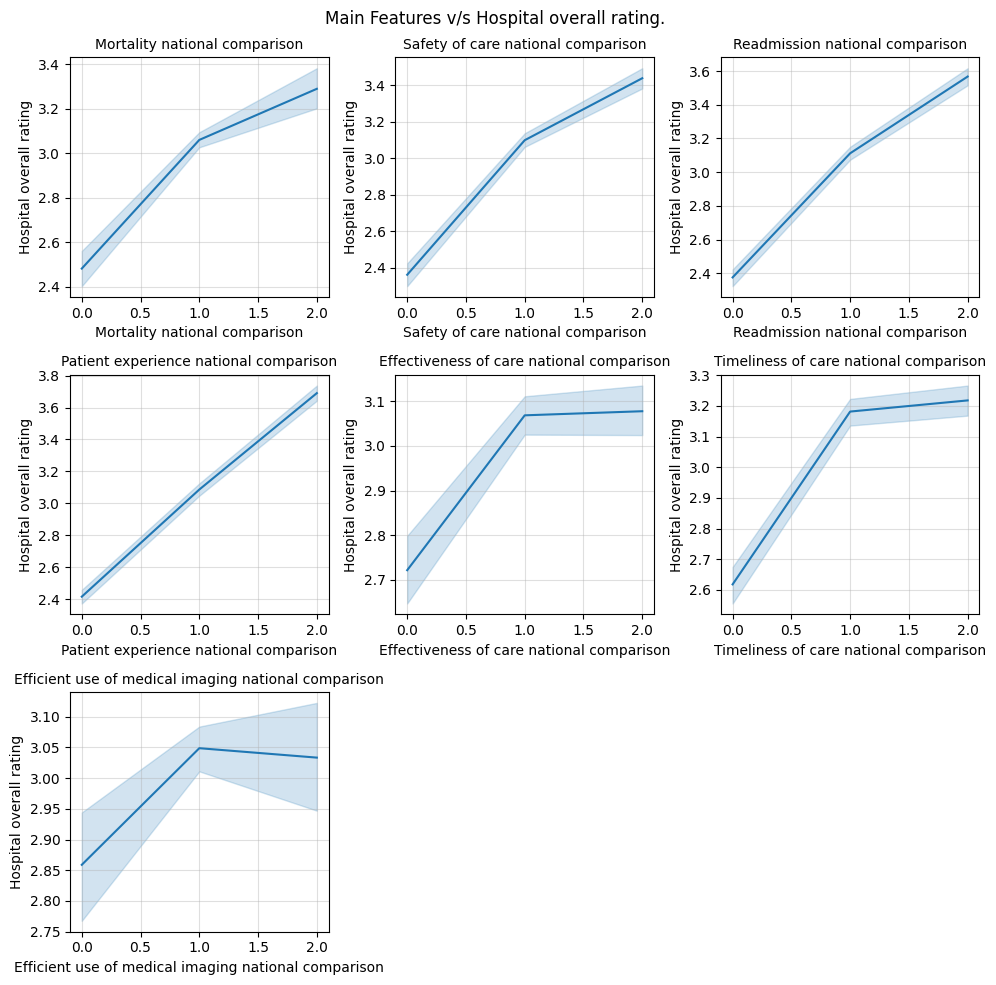

In [27]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

num_cols = len(main_features)
num_plots = min(num_cols, rows * cols)
num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

# Create a new figure for the measure
fig = plt.figure(figsize=(10, 10))

# Iterate over each column of the measure
for i, col in enumerate(main_features[:num_plots]):
    # Create subplot
    plt.subplot(num_rows, cols, i + 1)
    
    # Plot histogram
    ax = sns.lineplot(data=df, y='Hospital overall rating', x=df[col])
    ax.set_title(col, fontsize=10)
    ax.grid(alpha=0.4)
    
# Set title for each subplot
fig.suptitle("Main Features v/s Hospital overall rating.")
    
# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

### HeatMap betweem main measures.

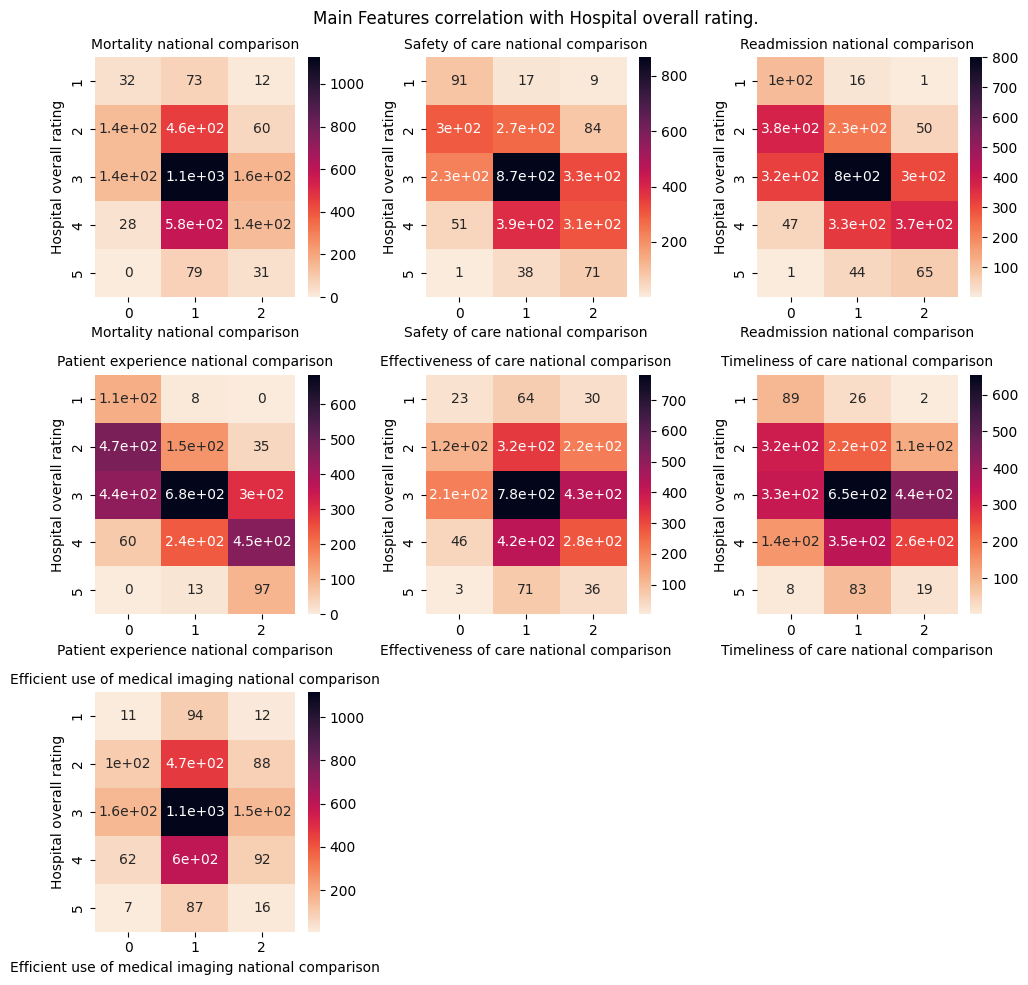

In [161]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

num_cols = len(main_features)
num_plots = min(num_cols, rows * cols)
num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

# Create a new figure for the measure
fig = plt.figure(figsize=(10, 10))

# Iterate over each column of the measure
for i, col in enumerate(main_features[:num_plots]):
    # Create subplot
    plt.subplot(num_rows, cols, i + 1)
    
    # Plot histogram
    ax = sns.heatmap(pd.crosstab(df['Hospital overall rating'], df[col]), cmap=sns.color_palette("rocket_r", as_cmap=True), annot=True)
    ax.set_title(f"{col}", fontsize=10)
    
# Set title for each subplot
fig.suptitle("Main Features correlation with Hospital overall rating.")
    
# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

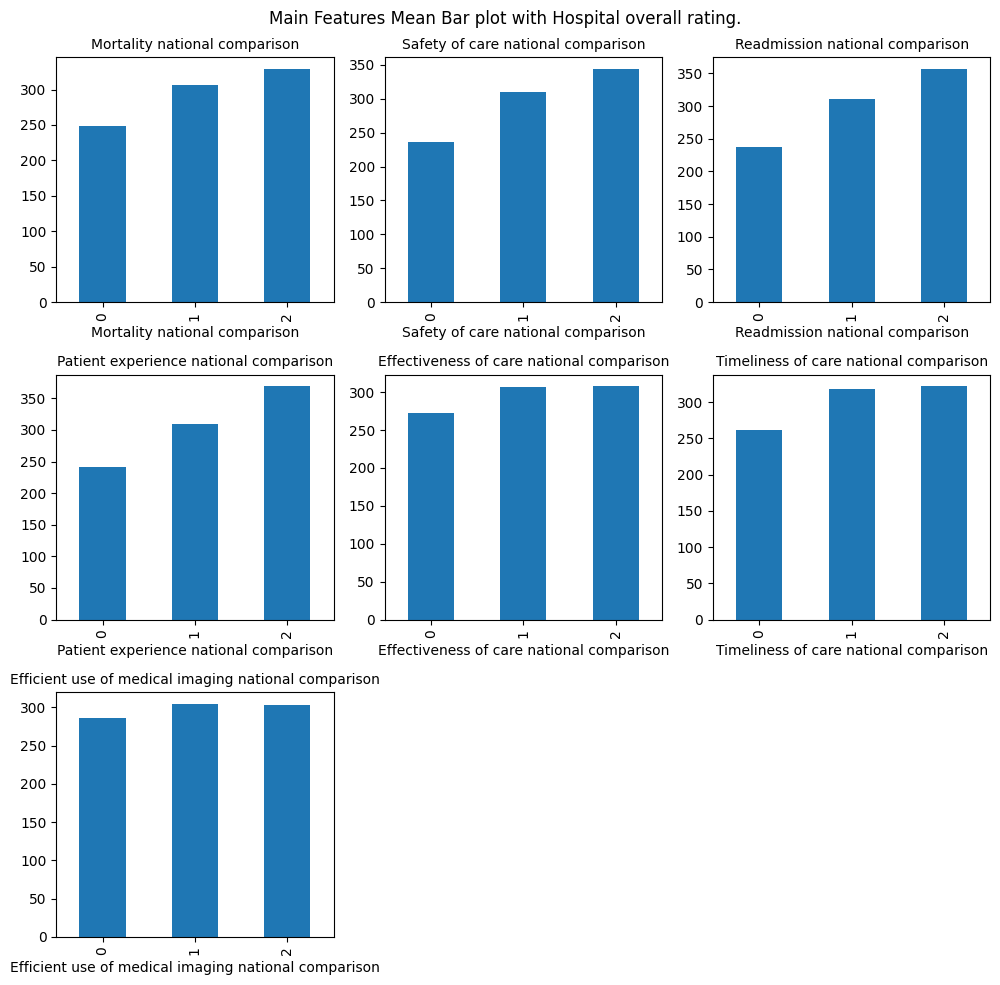

In [28]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

num_cols = len(main_features)
num_plots = min(num_cols, rows * cols)
num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

# Create a new figure for the measure
fig = plt.figure(figsize=(10, 10))

# Iterate over each column of the measure
for i, col in enumerate(main_features[:num_plots]):
    # Create subplot
    plt.subplot(num_rows, cols, i + 1)
    
    ax = (df.groupby(col).mean(numeric_only=True)['Hospital overall rating'] * 100).plot(kind='bar')
    ax.set_title(f"{col}", fontsize=10)
    
# Set title for each subplot
fig.suptitle("Main Features Mean Bar plot with Hospital overall rating.")
    
# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

### By Hospital Ownership and State of the hospital.

In [29]:
state_ownership_pivot_df = df.pivot_table(index="State", columns="Hospital Ownership", values=["Hospital overall rating"], aggfunc=["mean"])
state_df = state_ownership_pivot_df['mean']['Hospital overall rating'].reset_index(names="State")

#### Top 10 states by Hospital ownership.

In [30]:
top_state_gov = state_df.sort_values(by=["Government"], ascending=False)[:10][['State','Government']]
top_state_others = state_df.sort_values(by=["Others"], ascending=False)[:10][['State','Others']]
top_state_voluntary = state_df.sort_values(by=["Voluntary"], ascending=False)[:10][['State','Voluntary']]

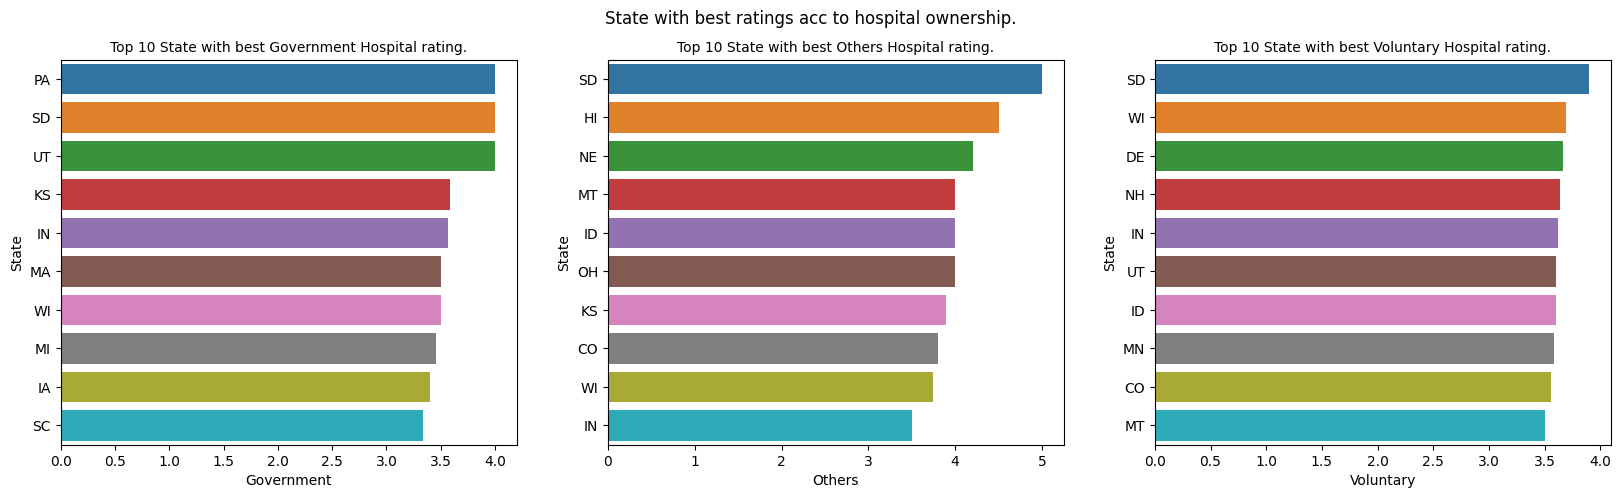

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("State with best ratings acc to hospital ownership.")

gov = sns.barplot(data=top_state_gov, x="Government", y="State", ax=ax[0])
gov.set_title("Top 10 State with best Government Hospital rating.", fontsize=10)


others = sns.barplot(data=top_state_others, x="Others", y="State", ax=ax[1])
others.set_title("Top 10 State with best Others Hospital rating.", fontsize=10)


voluntary = sns.barplot(data=top_state_voluntary, x="Voluntary", y="State", ax=ax[2])
voluntary.set_title("Top 10 State with best Voluntary Hospital rating.", fontsize=10)

plt.show()